# **Library**

## **Importing Libraries**

In [ ]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import math
import warnings
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import OneSidedSelection
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.exceptions import ConvergenceWarning

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# **Load Data**

## **Dataset 6: Lowongan Kerja**

In [ ]:
file_path_main = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_mentah/joined_data.csv'

In [ ]:
# Muat dataset Anda
df_main = pd.read_csv(file_path_main)

In [ ]:
df_main.head(10)

,id_pekerjaan,id_perusahaan,judul,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lamaran,diperbolehkan_jarak_jauh,...,mata_uang,tipe_kompensasi,id_industri,skill_1,skill_2,skill_3,nama_industri,nama_perusahaan,negara,jumlah_karyawan
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,NaN,NaN,...,USD,BASE_SALARY,17.0,OTHR,NOT,NOT,Medical Equipment Manufacturing,HearingLife,US,1171.0
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,NaN,NaN,...,NaN,NaN,135.0,MGMT,MNFC,NOT,Industrial Machinery Manufacturing,"Metalcraft of Mayville, Inc.",US,300.0
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,NaN,NaN,...,NaN,NaN,147.0,ENG,NOT,NOT,Automation Machinery Manufacturing,"U.S. Tsubaki Power Transmission, LLC",US,314.0
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,NaN,NaN,...,USD,BASE_SALARY,100.0,MGMT,MNFC,NOT,Non-profit Organizations,Episcopal Communities & Services,US,36.0
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,NaN,1.0,...,USD,BASE_SALARY,27.0,IT,NOT,NOT,Retail,"iHerb, LLC",US,1260.0
5,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,NaN,1.0,...,USD,BASE_SALARY,25.0,IT,NOT,NOT,Manufacturing,"iHerb, LLC",US,1260.0
6,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,NaN,1.0,...,USD,BASE_SALARY,6.0,IT,NOT,NOT,"Technology, Information and Internet","iHerb, LLC",US,1260.0
7,3757937037,13727.0,Territory Manager - New Haven,NaN,NaN,NaN,NaN,Full-time,NaN,1.0,...,NaN,NaN,17.0,SALE,BD,NOT,Medical Equipment Manufacturing,ZOLL Medical Corporation,US,5394.0
8,3757937004,10515052.0,Auto Body Techncian,NaN,NaN,NaN,NaN,Full-time,NaN,NaN,...,NaN,NaN,3198.0,MGMT,MNFC,NOT,Automotive,Boyd Group Services Inc.,CA,244.0
9,3757936167,2915.0,"ACME D8- Asst Store Director (ASD) Sussex, NJ",NaN,NaN,NaN,NaN,Full-time,NaN,NaN,...,NaN,NaN,27.0,SALE,BD,NOT,Retail,Acme Markets,US,4039.0


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43595 entries, 0 to 43594
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pekerjaan                  43595 non-null  int64  
 1   id_perusahaan                 42865 non-null  float64
 2   judul                         43595 non-null  object 
 3   gaji_maksimal                 15597 non-null  float64
 4   gaji_tengah                   2831 non-null   float64
 5   gaji_minimal                  15597 non-null  float64
 6   periode_pembayaran            18428 non-null  object 
 7   jenis_pekerjaan_terformat     43595 non-null  object 
 8   lamaran                       22189 non-null  float64
 9   diperbolehkan_jarak_jauh      6329 non-null   float64
 10  tipe_pendaftaran              43595 non-null  object 
 11  tingkat_pengalaman_terformat  31927 non-null  object 
 12  jenis_pekerjaan               43595 non-null  object 
 13  m

# **Missing Values**

## **Checking Missing Values**

In [ ]:
def cek_missing_values(df):
    # Identifikasi nilai yang hilang
    nilai_hilang = df.isnull()

    # Hitung jumlah nilai yang hilang
    jumlah_hilang = nilai_hilang.sum()

    # Cetak jumlah nilai yang hilang untuk setiap kolom
    print('Missing Values pada setiap kolom:')
    print(jumlah_hilang)

In [ ]:
cek_missing_values(df_main)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                     730
judul                               0
gaji_maksimal                   27998
gaji_tengah                     40764
gaji_minimal                    27998
periode_pembayaran              25167
jenis_pekerjaan_terformat           0
lamaran                         21406
diperbolehkan_jarak_jauh        37266
tipe_pendaftaran                    0
tingkat_pengalaman_terformat    11668
jenis_pekerjaan                     0
mata_uang                       25167
tipe_kompensasi                 25167
id_industri                       544
skill_1                          1216
skill_2                          1216
skill_3                          1216
nama_industri                     581
nama_perusahaan                   790
negara                            786
jumlah_karyawan                   732
dtype: int64


## **Handling Missing Values**

### **Drop Missing Values**

Drop Missing Values dilakukan dengan cara menghapus baris yang memiliki missing values. Hal ini karena jumlah missing values relatif sedikit jika dibandingkan jumlah total data, ditambah lagi missing values tersebut tidak bisa diimputasi dengan metode apapun.

Daftar kolom yang harus didrop:
- `id_industri`
- `nama_industri`

In [ ]:
df_drop_na = df_main.copy()

In [ ]:
# Menjatuhkan baris dengan nilai yang hilang di kolom 'id_perusahaan'
df_drop_na.dropna(subset=['id_industri'], inplace=True)

In [ ]:
# Drop nilai null dari kolom 'nama_industri'
df_drop_na.dropna(subset=['nama_industri'], inplace=True)

In [ ]:
cek_missing_values(df_drop_na)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                     226
judul                               0
gaji_maksimal                   27564
gaji_tengah                     40214
gaji_minimal                    27564
periode_pembayaran              24764
jenis_pekerjaan_terformat           0
lamaran                         21120
diperbolehkan_jarak_jauh        36808
tipe_pendaftaran                    0
tingkat_pengalaman_terformat    11110
jenis_pekerjaan                     0
mata_uang                       24764
tipe_kompensasi                 24764
id_industri                         0
skill_1                          1010
skill_2                          1010
skill_3                          1010
nama_industri                       0
nama_perusahaan                   286
negara                            282
jumlah_karyawan                   228
dtype: int64


### **Imputasi Missing Values**

#### Dengan `0` atau `Unkonwn`

Imputasi dengan menggunakan `0` atau `Unknown` dilakukan pada fitur yang memiliki missing values karena memang tidak ada informasi yang dapat diisi pada fitur tersebut namun fitur tersebut tetap dibutuhkan dalam analisis. Selain itu fitur dengan nilai boolean juga dapat diisi dengan `0` karena fitur tersebut hanya memiliki dua nilai.

Fitur Boolean:
- `diperbolehkan_jarak_jauh`

Fitur lain yang diisi dengan `0` atau `Unknown`:
- `id_perusahaan`
- `nama_perusahaan`
- `negara`
- `jumlah_karyawan`
- `lamaran`

In [ ]:
df_fill_naZer = df_drop_na.copy()

In [ ]:
def isi_missing_values(df,kolom):
    for fitur in kolom:
        if pd.api.types.is_numeric_dtype(df[fitur].dtype):  # Memeriksa apakah kolom numerik
            df[fitur].fillna(0, inplace=True)
        else:  # Jika bukan numerik
            df[fitur].fillna("Unknown", inplace=True)

In [ ]:
isi_missing_values(df_fill_naZer, ['diperbolehkan_jarak_jauh', 'id_perusahaan', 'lamaran', 'nama_perusahaan', 'negara', 'jumlah_karyawan'])

In [ ]:
cek_missing_values(df_fill_naZer)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                       0
judul                               0
gaji_maksimal                   27564
gaji_tengah                     40214
gaji_minimal                    27564
periode_pembayaran              24764
jenis_pekerjaan_terformat           0
lamaran                             0
diperbolehkan_jarak_jauh            0
tipe_pendaftaran                    0
tingkat_pengalaman_terformat    11110
jenis_pekerjaan                     0
mata_uang                       24764
tipe_kompensasi                 24764
id_industri                         0
skill_1                          1010
skill_2                          1010
skill_3                          1010
nama_industri                       0
nama_perusahaan                     0
negara                              0
jumlah_karyawan                     0
dtype: int64


#### Nilai Kategorikal

In [ ]:
df_fill_naKat = df_fill_naZer.copy()

##### Mata Uang

In [ ]:
df_fill_naKat.groupby('negara')['mata_uang'].unique()

negara
0          [USD, nan]
AE         [USD, nan]
AR              [nan]
AT              [nan]
AU         [nan, USD]
AZ              [nan]
BE         [USD, nan]
BM         [nan, USD]
BR              [nan]
CA         [nan, USD]
CH         [nan, USD]
CN         [nan, USD]
CO              [nan]
CZ              [USD]
DE         [nan, USD]
DK         [USD, nan]
EE              [nan]
ES         [nan, USD]
FI         [nan, USD]
FR         [USD, nan]
GB         [nan, USD]
GE              [USD]
HK         [USD, nan]
HR              [nan]
HU              [nan]
ID         [nan, USD]
IE         [nan, USD]
IL         [USD, nan]
IN         [nan, USD]
IS         [USD, nan]
IT         [nan, USD]
JP         [nan, USD]
KE              [USD]
KR         [USD, nan]
KY              [USD]
LI              [nan]
LU         [USD, nan]
MD              [USD]
MT              [USD]
MX         [USD, nan]
NL         [USD, nan]
NO         [USD, nan]
NZ              [nan]
OO         [nan, USD]
PH              [nan]
PR 

In [ ]:
# Mengisi nilai NaN dalam kolom mata uang dengan moda per negara
df_fill_naKat['mata_uang'] = df_fill_naKat.groupby('negara')['mata_uang'].transform(lambda x: x.fillna('USD') if x.mode().empty else x.fillna(x.mode().iloc[0]))

##### Tipe Kompensasi

In [ ]:
df_fill_naKat.groupby('id_industri')['tipe_kompensasi'].unique()

id_industri
1.0       [BASE_SALARY, nan]
3.0       [BASE_SALARY, nan]
4.0       [nan, BASE_SALARY]
5.0       [BASE_SALARY, nan]
6.0       [BASE_SALARY, nan]
                 ...        
3240.0         [BASE_SALARY]
3241.0    [BASE_SALARY, nan]
3242.0    [nan, BASE_SALARY]
3243.0    [BASE_SALARY, nan]
3251.0                 [nan]
Name: tipe_kompensasi, Length: 212, dtype: object

In [ ]:
# Mengisi nilai NaN dalam kolom tipe_kompensasi dengan moda per industri
df_fill_naKat['tipe_kompensasi'] = df_fill_naKat.groupby('id_industri')['tipe_kompensasi'].transform(lambda x: x.fillna('BASE_SALARY') if x.mode().empty else x.fillna(x.mode().iloc[0]))

##### Tingkat Pengalaman Terformat

In [ ]:
# Mengisi nilai NaN dalam kolom 'tingkat_pengalaman_terformat' dengan moda per 'id_industri'
df_fill_naKat['tingkat_pengalaman_terformat'] = df_fill_naKat.groupby('id_industri')['tingkat_pengalaman_terformat'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [ ]:
# Mengganti nilai NaN yang masih ada setelah transformasi pertama dengan moda dari 'tingkat_pengalaman_terformat' per 'jenis_pekerjaan_terformat'
group_mode = df_fill_naKat.groupby('jenis_pekerjaan_terformat')['tingkat_pengalaman_terformat'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)  # Hitung moda per 'jenis_pekerjaan_terformat'

# Mengisi nilai NaN yang masih ada dengan moda yang sesuai
for jenis_pekerjaan_terformat, mode_value in group_mode.items():
    df_fill_naKat.loc[(df_fill_naKat['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat) &
                      (df_fill_naKat['tingkat_pengalaman_terformat'].isna()),
                      'tingkat_pengalaman_terformat'] = mode_value

##### Periode Pembayaran

In [ ]:
# Kelompokkan berdasarkan kolom 'jenis_pekerjaan_terformat' dan 'id_industri', dan hitung mode dari kolom 'periode_pembayaran'
group_mode1 = df_fill_naKat.groupby(['id_industri', 'jenis_pekerjaan_terformat'])['periode_pembayaran'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Mengisi nilai NaN dengan mode yang sesuai dengan kelompoknya
for (id_industri, jenis_pekerjaan_terformat), mode_value in group_mode1.items():
    df_fill_naKat.loc[(df_fill_naKat['id_industri'] == id_industri) &
                      (df_fill_naKat['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat),
                      'periode_pembayaran'] = \
        df_fill_naKat.loc[(df_fill_naKat['id_industri'] == id_industri) &
                          (df_fill_naKat['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat),
                          'periode_pembayaran'].fillna(mode_value)

In [ ]:
# Kelompokkan berdasarkan kolom 'jenis_pekerjaan_terformat' dan 'tipe_pendaftaran', dan hitung mode dari kolom 'periode_pembayaran'
group_mode2 = df_fill_naKat.groupby(['jenis_pekerjaan_terformat', 'tipe_pendaftaran'])['periode_pembayaran'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Mengisi nilai NaN dengan mode yang sesuai dengan kelompoknya
for (jenis_pekerjaan_terformat, tipe_pendaftaran), mode_value in group_mode2.items():
    df_fill_naKat.loc[(df_fill_naKat['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat) &
                      (df_fill_naKat['tipe_pendaftaran'] == tipe_pendaftaran),
                      'periode_pembayaran'] = \
        df_fill_naKat.loc[(df_fill_naKat['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat) &
                          (df_fill_naKat['tipe_pendaftaran'] == tipe_pendaftaran),
                          'periode_pembayaran'].fillna(mode_value)

In [ ]:
cek_missing_values(df_fill_naKat)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                       0
judul                               0
gaji_maksimal                   27564
gaji_tengah                     40214
gaji_minimal                    27564
periode_pembayaran                 61
jenis_pekerjaan_terformat           0
lamaran                             0
diperbolehkan_jarak_jauh            0
tipe_pendaftaran                    0
tingkat_pengalaman_terformat        0
jenis_pekerjaan                     0
mata_uang                           0
tipe_kompensasi                     0
id_industri                         0
skill_1                          1010
skill_2                          1010
skill_3                          1010
nama_industri                       0
nama_perusahaan                     0
negara                              0
jumlah_karyawan                     0
dtype: int64


##### Periode Pembayaran Fase 2

In [ ]:
group_mode2

jenis_pekerjaan_terformat  tipe_pendaftaran  
Contract                   ComplexOnsiteApply    HOURLY
                           OffsiteApply          HOURLY
                           SimpleOnsiteApply     HOURLY
Full-time                  ComplexOnsiteApply    YEARLY
                           OffsiteApply          YEARLY
                           SimpleOnsiteApply     YEARLY
Internship                 ComplexOnsiteApply    HOURLY
                           OffsiteApply          HOURLY
                           SimpleOnsiteApply     HOURLY
Other                      ComplexOnsiteApply    HOURLY
                           OffsiteApply          HOURLY
                           SimpleOnsiteApply     HOURLY
Part-time                  ComplexOnsiteApply    HOURLY
                           OffsiteApply          HOURLY
                           SimpleOnsiteApply     HOURLY
Temporary                  ComplexOnsiteApply    HOURLY
                           OffsiteApply          HOURLY
  

Pada group mode kedua, ditemukan temuan unik yaitu semua mode yang digroupby berdasarkan jenis pekerjaan terformat dengan nilai `Volunteer` memiliki mode `NaN`. Ini masuk akal karena mayoritas pekerjaan volunteer tidak mendapatkan gaji. Oleh karena itu, akan di isi dengan nilai kategori baru yaitu `NOTPAID`.

In [ ]:
df_fill_naKat['periode_pembayaran'] = df_fill_naKat['periode_pembayaran'].fillna('NOTPAID')

In [ ]:
cek_missing_values(df_fill_naKat)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                       0
judul                               0
gaji_maksimal                   27564
gaji_tengah                     40214
gaji_minimal                    27564
periode_pembayaran                  0
jenis_pekerjaan_terformat           0
lamaran                             0
diperbolehkan_jarak_jauh            0
tipe_pendaftaran                    0
tingkat_pengalaman_terformat        0
jenis_pekerjaan                     0
mata_uang                           0
tipe_kompensasi                     0
id_industri                         0
skill_1                          1010
skill_2                          1010
skill_3                          1010
nama_industri                       0
nama_perusahaan                     0
negara                              0
jumlah_karyawan                     0
dtype: int64


##### Skill_1, Skill_2, Skill_3

In [ ]:
# # Mencari mode gabungan 'skill_1', 'skill_2', dan 'skill_3' berdasarkan 'id_industri'
# group_mode = df_fill_naKat.groupby('id_industri')[['skill_1', 'skill_2', 'skill_3']].apply(lambda x: x.mode().iloc[0])

# # Mengganti nilai NaN dengan mode yang sesuai
# df_fill_naKat[['skill_1', 'skill_2', 'skill_3']] = df_fill_naKat[['skill_1', 'skill_2', 'skill_3']].fillna(group_mode)

In [ ]:
# Menggabungkan nilai 'skill_1', 'skill_2', dan 'skill_3' untuk setiap 'id_industri'
combined_skills = df_fill_naKat.groupby('id_industri')[['skill_1', 'skill_2', 'skill_3']].apply(lambda x: x.values.flatten().tolist())

def calculate_mode(x, mode_number):
    if x:
        non_nan_values = [value for value in x if pd.notna(value)]
        if non_nan_values:
            mode_count = Counter(non_nan_values).most_common()
            if len(mode_count) >= mode_number:  # Memastikan mode ke-n ada
                return mode_count[mode_number - 1][0]  # Mengembalikan mode ke-n
            else:
                return np.nan  # Jika tidak ada mode ke-n
        else:
            return np.nan  # Jika semua nilai NaN
    else:
        return np.nan  # Jika tidak ada nilai

# Contoh pemanggilan untuk menghitung mode pertama
group_mode_skills_1 = combined_skills.apply(lambda x: calculate_mode(x, 1))

# Contoh pemanggilan untuk menghitung mode kedua
group_mode_skills_2 = combined_skills.apply(lambda x: calculate_mode(x, 2))

# Contoh pemanggilan untuk menghitung mode ketiga
group_mode_skills_3 = combined_skills.apply(lambda x: calculate_mode(x, 3))

In [ ]:
# Fungsi untuk mengisi nilai NaN sesuai aturan yang Anda tentukan
def fill_na_skills(row):

    mode_1 = group_mode_skills_1[row['id_industri']]
    mode_2 = group_mode_skills_2[row['id_industri']]
    mode_3 = group_mode_skills_3[row['id_industri']]

    if mode_1 == 'NOT':
        if pd.isna(row['skill_1']):
            row['skill_1'] = mode_2
        if pd.isna(row['skill_2']):
            row['skill_2'] = 'NOT'
        if pd.isna(row['skill_3']):
            row['skill_3'] = 'NOT'
    else:
        if pd.isna(row['skill_1']):
            row['skill_1'] = mode_1
        if pd.isna(row['skill_2']):
            if pd.isna(mode_2):
                row['skill_2'] = 'NOT'
            else:
                row['skill_2'] = mode_2
        if pd.isna(row['skill_3']):
            if pd.isna(mode_3):
                row['skill_3'] = 'NOT'
            else:
                row['skill_3'] = mode_3
    return row

# Mengisi nilai NaN dengan aturan yang ditentukan
df_fill_naKat = df_fill_naKat.apply(fill_na_skills, axis=1)

In [ ]:
cek_missing_values(df_fill_naKat)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                       0
judul                               0
gaji_maksimal                   27564
gaji_tengah                     40214
gaji_minimal                    27564
periode_pembayaran                  0
jenis_pekerjaan_terformat           0
lamaran                             0
diperbolehkan_jarak_jauh            0
tipe_pendaftaran                    0
tingkat_pengalaman_terformat        0
jenis_pekerjaan                     0
mata_uang                           0
tipe_kompensasi                     0
id_industri                         0
skill_1                             0
skill_2                             0
skill_3                             0
nama_industri                       0
nama_perusahaan                     0
negara                              0
jumlah_karyawan                     0
dtype: int64


#### Nilai Continuous

##### Fitur Gaji

In [ ]:
df_fill_naCon = df_fill_naKat.copy()

In [ ]:
df_fill_naCon['periode_pembayaran'].unique()

array(['MONTHLY', 'YEARLY', 'HOURLY', 'NOTPAID', 'WEEKLY', 'ONCE'],
      dtype=object)

In [ ]:
# Menghitung jumlah kemunculan nilai ONCE dalam periode_pembayaran
on = (df_fill_naCon['periode_pembayaran'] == 'ONCE').sum()
print(on)

1


In [ ]:
df_fill_naCon = df_fill_naCon.drop(df_fill_naCon[df_fill_naCon['periode_pembayaran'] == 'ONCE'].index)

In [ ]:
df_fill_naCon['gaji_rata'] = (df_fill_naCon['gaji_minimal'] + df_fill_naCon['gaji_maksimal'])/2

# Mengisi nilai yang hilang dalam kolom 'gaji_rata' dengan nilai dari kolom 'gaji_tengah' hanya jika kolom 'gaji_rata' sebelumnya berisi nilai NaN
mask = df_fill_naCon['gaji_rata'].isna()
df_fill_naCon.loc[mask, 'gaji_rata'] = df_fill_naCon.loc[mask, 'gaji_tengah']

df_fill_naCon.head(5)

,id_pekerjaan,id_perusahaan,judul,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lamaran,diperbolehkan_jarak_jauh,...,tipe_kompensasi,id_industri,skill_1,skill_2,skill_3,nama_industri,nama_perusahaan,negara,jumlah_karyawan,gaji_rata
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,0.0,0.0,...,BASE_SALARY,17.0,OTHR,NOT,NOT,Medical Equipment Manufacturing,HearingLife,US,1171.0,5250.00
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,YEARLY,Full-time,0.0,0.0,...,BASE_SALARY,135.0,MGMT,MNFC,NOT,Industrial Machinery Manufacturing,"Metalcraft of Mayville, Inc.",US,300.0,NaN
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,YEARLY,Full-time,0.0,0.0,...,BASE_SALARY,147.0,ENG,NOT,NOT,Automation Machinery Manufacturing,"U.S. Tsubaki Power Transmission, LLC",US,314.0,NaN
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,0.0,0.0,...,BASE_SALARY,100.0,MGMT,MNFC,NOT,Non-profit Organizations,Episcopal Communities & Services,US,36.0,22.27
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,0.0,1.0,...,BASE_SALARY,27.0,IT,NOT,NOT,Retail,"iHerb, LLC",US,1260.0,240895.00


In [ ]:
def monthly(periode, gaji_rata):
    if periode == 'HOURLY':
        return gaji_rata * 8 * 22
    elif periode == 'YEARLY':
        return gaji_rata / 12
    elif periode == 'WEEKLY':
        return gaji_rata * 4
    elif periode == 'NOTPAID':
        return 0
    else:
        return gaji_rata

# Menambahkan kolom 'gaji_rata-perbulan' setelah kolom 'judul'
index_judul = df_fill_naCon.columns.get_loc('judul')  # Mendapatkan indeks kolom 'judul'
df_fill_naCon.insert(index_judul + 1, 'gaji_rata-rata_perbulan', df_fill_naCon.apply(lambda row: monthly(row['periode_pembayaran'], row['gaji_rata']), axis=1))
df_fill_naCon

,id_pekerjaan,id_perusahaan,judul,gaji_rata-rata_perbulan,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lamaran,...,tipe_kompensasi,id_industri,skill_1,skill_2,skill_3,nama_industri,nama_perusahaan,negara,jumlah_karyawan,gaji_rata
0,3757940104,553718.0,Hearing Care Provider,5250.000000,NaN,5250.00,NaN,MONTHLY,Full-time,0.0,...,BASE_SALARY,17.0,OTHR,NOT,NOT,Medical Equipment Manufacturing,HearingLife,US,1171.0,5250.00
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,YEARLY,Full-time,0.0,...,BASE_SALARY,135.0,MGMT,MNFC,NOT,Industrial Machinery Manufacturing,"Metalcraft of Mayville, Inc.",US,300.0,NaN
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,YEARLY,Full-time,0.0,...,BASE_SALARY,147.0,ENG,NOT,NOT,Automation Machinery Manufacturing,"U.S. Tsubaki Power Transmission, LLC",US,314.0,NaN
3,3757938018,18213359.0,Cook,3919.520000,NaN,22.27,NaN,HOURLY,Full-time,0.0,...,BASE_SALARY,100.0,MGMT,MNFC,NOT,Non-profit Organizations,Episcopal Communities & Services,US,36.0,22.27
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),20074.583333,275834.0,NaN,205956.0,YEARLY,Full-time,0.0,...,BASE_SALARY,27.0,IT,NOT,NOT,Retail,"iHerb, LLC",US,1260.0,240895.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43590,133114754,77766802.0,Sales Manager,NaN,NaN,NaN,NaN,YEARLY,Full-time,0.0,...,BASE_SALARY,92.0,SALE,BD,NOT,Truck Transportation,CargoLogin.,US,15.0,NaN
43591,108965123,0.0,Office Administrative Assistant,NaN,NaN,NaN,NaN,YEARLY,Full-time,2.0,...,BASE_SALARY,19.0,ADM,NOT,NOT,Retail Apparel and Fashion,Unknown,Unknown,0.0,NaN
43592,102339515,52132271.0,Franchise Owner,NaN,NaN,NaN,NaN,YEARLY,Full-time,0.0,...,BASE_SALARY,91.0,BD,SALE,NOT,Consumer Services,DryerVentz - DuctVentz,US,7.0,NaN
43593,85008768,0.0,Licensed Insurance Agent,4073.333333,52000.0,NaN,45760.0,YEARLY,Full-time,0.0,...,BASE_SALARY,42.0,SALE,BD,NOT,Insurance,Unknown,Unknown,0.0,48880.00


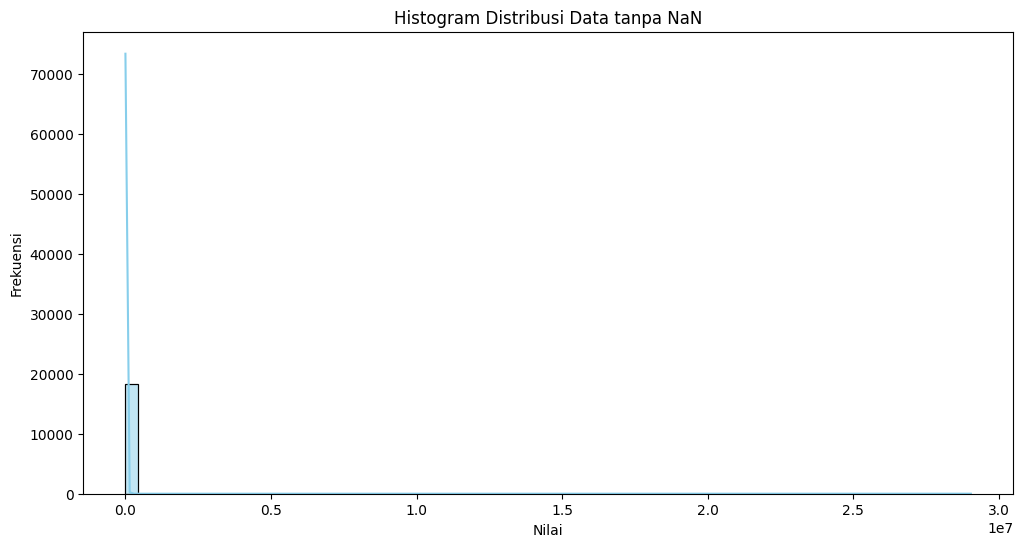

In [ ]:
# Menghapus nilai NaN dari kolom 'gaji_rata-rata_perbulan'
data_without_nan = df_fill_naCon.dropna(subset=['gaji_rata-rata_perbulan'])

# Memvisualisasikan histogram setelah menghapus nilai NaN
plt.figure(figsize=(12, 6))
sns.histplot(data=data_without_nan, x='gaji_rata-rata_perbulan', bins=70, kde=True, color='skyblue')
plt.title('Histogram Distribusi Data tanpa NaN')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

In [ ]:
# Kelompokkan berdasarkan kolom 'id_industri' dan hitung median dari kolom 'gaji_rata-rata_perbulan'
group_median2 = df_fill_naCon.groupby('id_industri')['gaji_rata-rata_perbulan'].median()

# Mengisi nilai NaN dengan median yang sesuai dengan kelompoknya
for name, median_value in group_median2.items():
    df_fill_naCon.loc[df_fill_naCon['id_industri'] == name, 'gaji_rata-rata_perbulan'] = \
        df_fill_naCon.loc[df_fill_naCon['id_industri'] == name, 'gaji_rata-rata_perbulan'].fillna(median_value)

In [ ]:
# Kelompokkan berdasarkan kolom 'jenis_pekerjaan_terformat' dan 'tingkat_pengalaman_terformat', dan hitung median dari kolom 'gaji_rata-rata_perbulan'
group_median3 = df_fill_naCon.groupby(['jenis_pekerjaan_terformat', 'tingkat_pengalaman_terformat'])['gaji_rata-rata_perbulan'].median()

# Mengisi nilai NaN dengan median yang sesuai dengan kelompoknya
for (jenis_pekerjaan_terformat, tingkat_pengalaman_terformat), median_value in group_median3.items():
    df_fill_naCon.loc[(df_fill_naCon['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat) &
                      (df_fill_naCon['tingkat_pengalaman_terformat'] == tingkat_pengalaman_terformat),
                      'gaji_rata-rata_perbulan'] = \
        df_fill_naCon.loc[(df_fill_naCon['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat) &
                          (df_fill_naCon['tingkat_pengalaman_terformat'] == tingkat_pengalaman_terformat),
                          'gaji_rata-rata_perbulan'].fillna(median_value)

In [ ]:
cek_missing_values(df_fill_naCon)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                       0
judul                               0
gaji_rata-rata_perbulan             0
gaji_maksimal                   27564
gaji_tengah                     40213
gaji_minimal                    27564
periode_pembayaran                  0
jenis_pekerjaan_terformat           0
lamaran                             0
diperbolehkan_jarak_jauh            0
tipe_pendaftaran                    0
tingkat_pengalaman_terformat        0
jenis_pekerjaan                     0
mata_uang                           0
tipe_kompensasi                     0
id_industri                         0
skill_1                             0
skill_2                             0
skill_3                             0
nama_industri                       0
nama_perusahaan                     0
negara                              0
jumlah_karyawan                     0
gaji_rata                       24764
dtype: int64


### **Droping Fitur**

Droping Fitur dilakukan karena missing values yang ada sangat banyak dan telah ada fitur lain yang dapat menggantikan informasi yang terdapat pada fitur yang di-drop. Namun fitur lain ini harus dilakukan Feature Engineering terlebih dahulu.

Daftar kolom yang harus didrop:
- `gaji_tengah`
- `gaji_minimal`
- `gaji_maksimal`
- `gaji_rata`


In [ ]:
def drop_fitur(df, fitur):
    if isinstance(fitur, str):  # Jika hanya satu fitur yang ingin dijatuhkan
        df.drop(columns=[fitur], inplace=True)
    elif isinstance(fitur, list):  # Jika lebih dari satu fitur yang ingin dijatuhkan
        df.drop(columns=fitur, inplace=True)
    else:
        raise TypeError("Parameter 'fitur' harus berupa string atau list.")

In [ ]:
df_drop_ft = df_fill_naCon.copy()

In [ ]:
drop_fitur(df_drop_ft, ['gaji_tengah', 'gaji_minimal', 'gaji_maksimal', 'gaji_rata'])

In [ ]:
cek_missing_values(df_drop_ft)

Missing Values pada setiap kolom:
id_pekerjaan                    0
id_perusahaan                   0
judul                           0
gaji_rata-rata_perbulan         0
periode_pembayaran              0
jenis_pekerjaan_terformat       0
lamaran                         0
diperbolehkan_jarak_jauh        0
tipe_pendaftaran                0
tingkat_pengalaman_terformat    0
jenis_pekerjaan                 0
mata_uang                       0
tipe_kompensasi                 0
id_industri                     0
skill_1                         0
skill_2                         0
skill_3                         0
nama_industri                   0
nama_perusahaan                 0
negara                          0
jumlah_karyawan                 0
dtype: int64


In [ ]:
# df_drop_ft.to_csv('../Dataset/data_FP/clean_missing_values.csv', index=False)

# **Duplicate Values**

In [ ]:
# Path file CSV
path_file_dup = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_missing_values/clean_missing_values.csv'

# Membaca file CSV ke dalam DataFrame
df_missing_fixed = pd.read_csv(path_file_dup)

In [ ]:
# Mendeteksi duplikat data dalam DataFrame
duplikat = df_missing_fixed.duplicated()

# Menampilkan baris yang merupakan duplikat
duplikat_rows = df_missing_fixed[duplikat]
print("Baris yang merupakan duplikat:")
print(duplikat_rows)

Baris yang merupakan duplikat:
Empty DataFrame
Columns: [id_pekerjaan, id_perusahaan, judul, gaji_rata-rata_perbulan, periode_pembayaran, jenis_pekerjaan_terformat, lamaran, diperbolehkan_jarak_jauh, tipe_pendaftaran, tingkat_pengalaman_terformat, jenis_pekerjaan, mata_uang, tipe_kompensasi, id_industri, skill_1, skill_2, skill_3, nama_industri, nama_perusahaan, negara, jumlah_karyawan]
Index: []

[0 rows x 21 columns]


# **Reduksi Dimensi**

In [ ]:
# Path file CSV
path_file_reduk = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_missing_values/clean_missing_values.csv'

# Membaca file CSV ke dalam DataFrame
df_dup = pd.read_csv(path_file_reduk)

In [ ]:
# Hitung jumlah data untuk setiap id_industri
id_industri_counts = df_dup['id_industri'].value_counts()

# Buat daftar id_industri yang memiliki 100 data atau lebih
valid_id_industri = id_industri_counts[id_industri_counts >= 100].index

# Filter DataFrame untuk hanya menyertakan id_industri yang valid
df_reduksi_dimesnsi = df_dup[df_dup['id_industri'].isin(valid_id_industri)]

# Tampilkan hasilnya untuk memverifikasi
df_reduksi_dimesnsi

,id_pekerjaan,id_perusahaan,judul,gaji_rata-rata_perbulan,periode_pembayaran,jenis_pekerjaan_terformat,lamaran,diperbolehkan_jarak_jauh,tipe_pendaftaran,tingkat_pengalaman_terformat,...,mata_uang,tipe_kompensasi,id_industri,skill_1,skill_2,skill_3,nama_industri,nama_perusahaan,negara,jumlah_karyawan
0,3757940104,553718.0,Hearing Care Provider,5250.000000,MONTHLY,Full-time,0.0,0.0,OffsiteApply,Entry level,...,USD,BASE_SALARY,17.0,OTHR,NOT,NOT,Medical Equipment Manufacturing,HearingLife,US,1171.0
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,7085.416667,YEARLY,Full-time,0.0,0.0,OffsiteApply,Mid-Senior level,...,USD,BASE_SALARY,135.0,MGMT,MNFC,NOT,Industrial Machinery Manufacturing,"Metalcraft of Mayville, Inc.",US,300.0
2,3757938019,474443.0,"Manager, Engineering",6776.000000,YEARLY,Full-time,0.0,0.0,OffsiteApply,Mid-Senior level,...,USD,BASE_SALARY,147.0,ENG,NOT,NOT,Automation Machinery Manufacturing,"U.S. Tsubaki Power Transmission, LLC",US,314.0
3,3757938018,18213359.0,Cook,3919.520000,HOURLY,Full-time,0.0,0.0,OffsiteApply,Entry level,...,USD,BASE_SALARY,100.0,MGMT,MNFC,NOT,Non-profit Organizations,Episcopal Communities & Services,US,36.0
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),20074.583333,YEARLY,Full-time,0.0,1.0,OffsiteApply,Mid-Senior level,...,USD,BASE_SALARY,27.0,IT,NOT,NOT,Retail,"iHerb, LLC",US,1260.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43007,133196985,1089558.0,Model Risk Auditor,7500.000000,HOURLY,Contract,1.0,0.0,ComplexOnsiteApply,Mid-Senior level,...,USD,BASE_SALARY,104.0,ACCT,FIN,NOT,Staffing and Recruiting,Employvision Inc.,US,50.0
43008,133114754,77766802.0,Sales Manager,5632.000000,YEARLY,Full-time,0.0,0.0,ComplexOnsiteApply,Entry level,...,USD,BASE_SALARY,92.0,SALE,BD,NOT,Truck Transportation,CargoLogin.,US,15.0
43009,108965123,0.0,Office Administrative Assistant,4583.333333,YEARLY,Full-time,2.0,0.0,ComplexOnsiteApply,Mid-Senior level,...,USD,BASE_SALARY,19.0,ADM,NOT,NOT,Retail Apparel and Fashion,Unknown,Unknown,0.0
43010,102339515,52132271.0,Franchise Owner,5479.166667,YEARLY,Full-time,0.0,0.0,SimpleOnsiteApply,Mid-Senior level,...,USD,BASE_SALARY,91.0,BD,SALE,NOT,Consumer Services,DryerVentz - DuctVentz,US,7.0


In [ ]:
# Hitung jumlah data untuk setiap id_industri
id_industri_counts = df_reduksi_dimesnsi['id_industri'].value_counts()

# Tampilkan label dan jumlah values-nya
id_industri_counts

id_industri
96.0     3675
14.0     3526
104.0    2729
27.0     1971
43.0     1891
         ... 
45.0      121
56.0      107
67.0      104
30.0      101
132.0     100
Name: count, Length: 75, dtype: int64

In [ ]:
# df_reduksi_dimesnsi.to_csv('../Dataset/data_FP/reduksi_dimensi.csv', index=False)

# **Outliers**

## **Checking Outliers**

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# Path file CSV
path_file_out = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_reduksi_dimensi/reduksi_dimensi.csv'

# Membaca file CSV ke dalam DataFrame
df_missing_fixed = pd.read_csv(path_file_out)

In [ ]:
# Pilih kolom-kolom numerik
columns_numeric = df_missing_fixed.select_dtypes(include=['int64', 'float64']).columns

# Eksklusikan kolom-kolom tertentu
columns_to_exclude = ['id_pekerjaan', 'id_perusahaan', 'id_industri', 'diperbolehkan_jarak_jauh']
columns_filtered = [col for col in columns_numeric if col not in columns_to_exclude]

### **Boxplot**

In [ ]:
def plot_boxplot(df, target_columns, figsize=(12, 8)):
    num_plots = len(target_columns)
    num_cols = 4

    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, column in enumerate(target_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        sns.boxplot(y=df[column], ax=ax)
        ax.set_title(f'Boxplot {column}')

    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

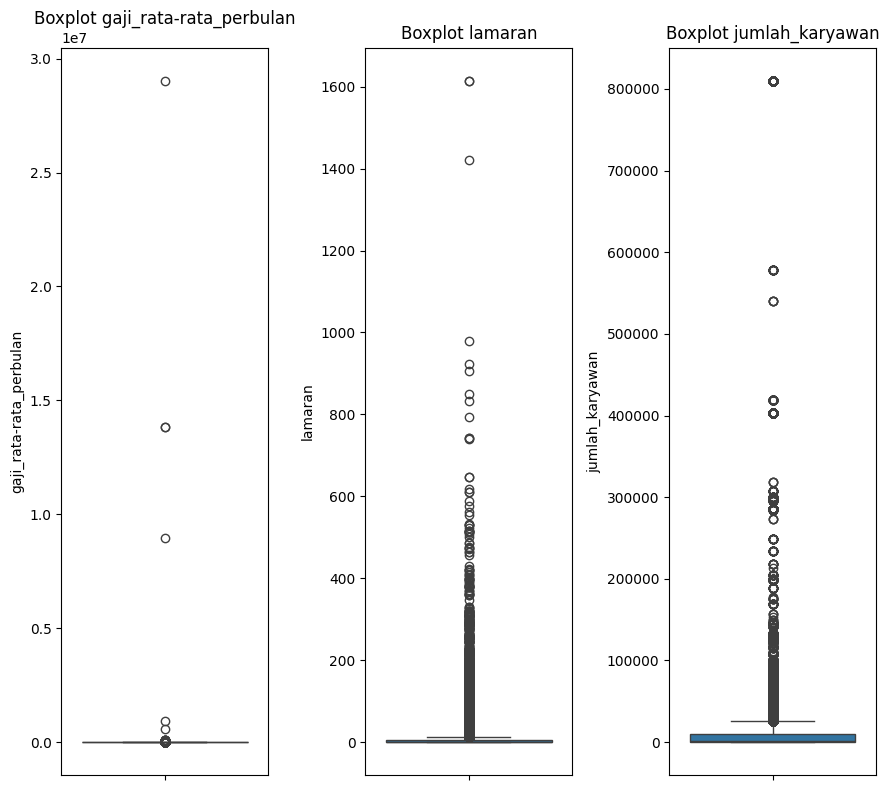

In [ ]:
plot_boxplot(df_missing_fixed, columns_filtered)

### **IQR**

In [ ]:
def find_outliers_iqr(df, cols, threshold=1.5):
    outliers = pd.DataFrame()
    for col in cols:
        # Hitung kuartil ke-1 (Q1) dan kuartil ke-3 (Q3)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        # Hitung IQR
        IQR = Q3 - Q1
        # Tentukan batas bawah dan batas atas untuk outlier
        lower_bound = Q1 - (threshold * IQR)
        upper_bound = Q3 + (threshold * IQR)
        # Temukan indeks baris yang di luar batas
        outlier_index = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]
        # Tambahkan baris outlier ke DataFrame outliers
        outliers = pd.concat([outliers, df.loc[outlier_index]])
    # Menghapus duplikasi berdasarkan kolom 'ID_Pekerjaan'
    outliers = outliers.drop_duplicates(subset='id_pekerjaan')
    return outliers

In [ ]:
# Menampilkan outlier dari kolom filtered menggunakan metode IQR
outliers = find_outliers_iqr(df_missing_fixed, columns_filtered)
outliers.sort_values(by='id_pekerjaan')

,id_pekerjaan,id_perusahaan,judul,gaji_rata-rata_perbulan,periode_pembayaran,jenis_pekerjaan_terformat,lamaran,diperbolehkan_jarak_jauh,tipe_pendaftaran,tingkat_pengalaman_terformat,...,mata_uang,tipe_kompensasi,id_industri,skill_1,skill_2,skill_3,nama_industri,nama_perusahaan,negara,jumlah_karyawan
39759,967848246,18995316.0,Education Manager,10864.583333,YEARLY,Full-time,45.0,1.0,OffsiteApply,Mid-Senior level,...,USD,BASE_SALARY,4.0,EDU,TRNG,NOT,Software Development,Paradigm Senior Services,US,49.0
39758,1004740969,882349.0,Civil Engineer,8579.166667,YEARLY,Full-time,28.0,0.0,ComplexOnsiteApply,Mid-Senior level,...,USD,BASE_SALARY,51.0,ENG,IT,NOT,Civil Engineering,"Eric L. Davis Engineering, Inc.",US,95.0
39743,2148434014,1016.0,"Virtual Sales Associate Account Manager, Women...",6778.640000,YEARLY,Full-time,0.0,1.0,OffsiteApply,Entry level,...,USD,BASE_SALARY,14.0,SALE,NOT,NOT,Hospitals and Health Care,GE HealthCare,US,54639.0
39740,2148434019,1016.0,"Virtual Sales Associate Account Manager, Women...",6778.640000,YEARLY,Full-time,0.0,1.0,OffsiteApply,Entry level,...,USD,BASE_SALARY,14.0,SALE,NOT,NOT,Hospitals and Health Care,GE HealthCare,US,54639.0
39728,2148434616,15564.0,"Lead Solar Maintenance Roofer, Residential Ser...",5720.000000,HOURLY,Full-time,0.0,0.0,OffsiteApply,Mid-Senior level,...,USD,BASE_SALARY,53.0,MGMT,MNFC,NOT,Motor Vehicle Manufacturing,Tesla,US,59268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,3757934264,73013724.0,Sales Manager,19791.666667,YEARLY,Full-time,0.0,1.0,ComplexOnsiteApply,Mid-Senior level,...,USD,BASE_SALARY,43.0,SALE,BD,NOT,Financial Services,J. Galt,US,358.0
30,3757934281,2238.0,"Senior Manager, Indirect Procurement",9958.333333,YEARLY,Full-time,0.0,0.0,SimpleOnsiteApply,Mid-Senior level,...,USD,BASE_SALARY,23.0,STRA,GENB,MGMT,Food and Beverage Manufacturing,Danone,FR,75307.0
18,3757935001,73013724.0,Sales Manager,19791.666667,YEARLY,Full-time,0.0,1.0,ComplexOnsiteApply,Mid-Senior level,...,USD,BASE_SALARY,43.0,SALE,BD,NOT,Financial Services,J. Galt,US,358.0
14,3757935012,18583501.0,Quantitative Trader [5048],10864.583333,YEARLY,Full-time,36.0,0.0,ComplexOnsiteApply,Associate,...,USD,BASE_SALARY,4.0,IT,NOT,NOT,Software Development,Stealth Startup,US,16736.0


## **Handling Outliers**

### **Winsorization**

In [ ]:
def transform_outliersW(df, numeric_columns):
    df_copy = df.copy()

    for column in numeric_columns:
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        if (df_copy[column] < lower_bound).any() or (df_copy[column] > upper_bound).any():
            values = df_copy[column].values
            winsorized_data = winsorize(values, limits=[0.05, 0.05])
            df_copy[column] = winsorized_data

    return df_copy

In [ ]:
df_otcW = transform_outliersW(df_missing_fixed, columns_filtered)

### **Capping**

In [ ]:
def transform_outliersC(df, numeric_columns):
    df_copy = df.copy()

    for column in numeric_columns:
        q1 = df_copy[column].quantile(0.25)
        q3 = df_copy[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        df_copy[column] = df_copy[column].clip(lower=lower_bound, upper=upper_bound)

    return df_copy

In [ ]:
df_otcC = transform_outliersC(df_missing_fixed, columns_filtered)

## **Checking Outliers After Handling**

### **Boxplot**

#### Winsorization

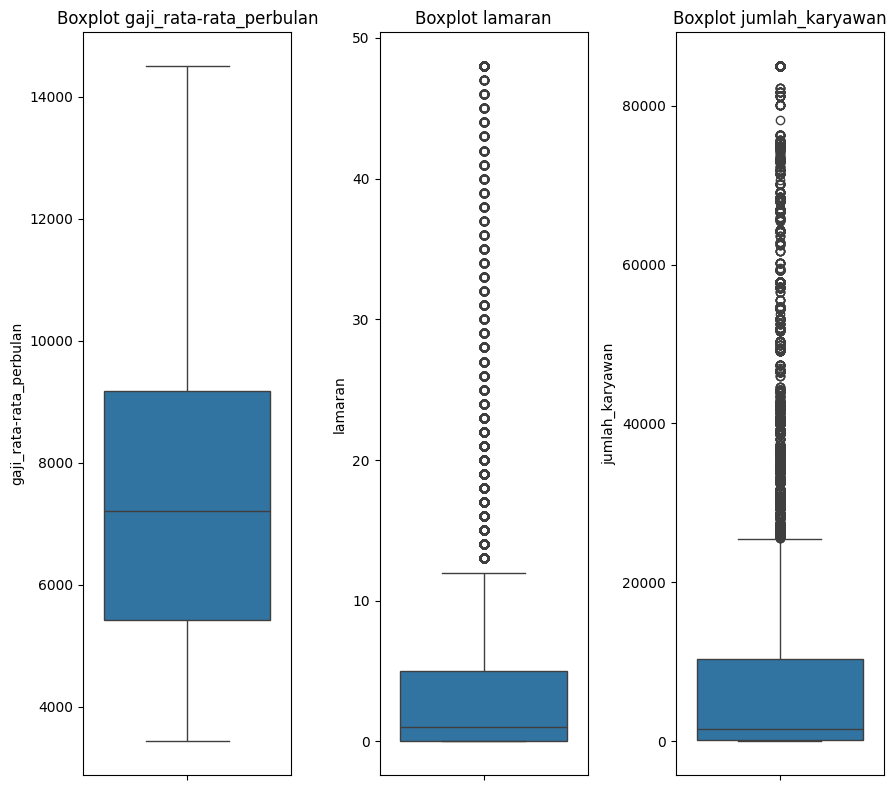

In [ ]:
plot_boxplot(df_otcW, columns_filtered)

#### Capping

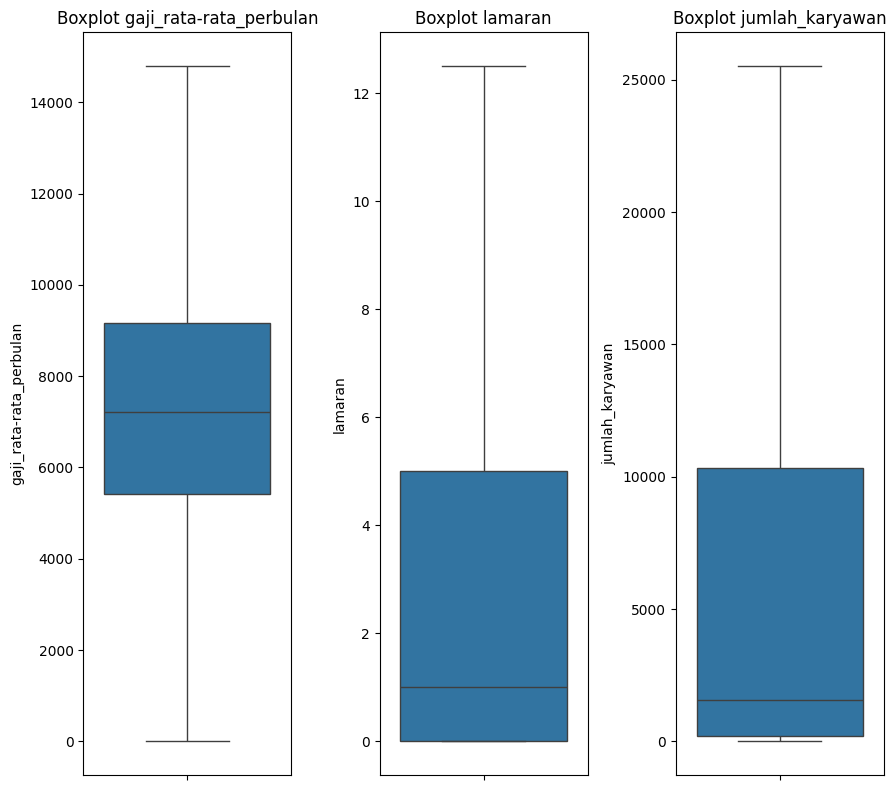

In [ ]:
plot_boxplot(df_otcC, columns_filtered)

### **IQR**

#### Winsorization

In [ ]:
outliers1 = find_outliers_iqr(df_otcW, columns_filtered)
outliers1

,id_pekerjaan,id_perusahaan,judul,gaji_rata-rata_perbulan,periode_pembayaran,jenis_pekerjaan_terformat,lamaran,diperbolehkan_jarak_jauh,tipe_pendaftaran,tingkat_pengalaman_terformat,...,mata_uang,tipe_kompensasi,id_industri,skill_1,skill_2,skill_3,nama_industri,nama_perusahaan,negara,jumlah_karyawan
14,3757935012,18583501.0,Quantitative Trader [5048],10864.583333,YEARLY,Full-time,36.0,0.0,ComplexOnsiteApply,Associate,...,USD,BASE_SALARY,4.0,IT,NOT,NOT,Software Development,Stealth Startup,US,16736.0
117,3757928945,91313799.0,Software Quality Assurance Engineer [5291],7708.333333,YEARLY,Full-time,48.0,0.0,ComplexOnsiteApply,Entry level,...,USD,BASE_SALARY,17.0,ENG,QA,NOT,Medical Equipment Manufacturing,Stealth,US,863.0
136,3757924082,53395150.0,Social Media Manager,10864.583333,YEARLY,Full-time,24.0,1.0,OffsiteApply,Mid-Senior level,...,USD,BASE_SALARY,4.0,MRKT,SALE,NOT,Software Development,Waivly,OO,10.0
148,3757922135,2957445.0,Fullstack Engineer,12716.708333,YEARLY,Full-time,16.0,0.0,OffsiteApply,Entry level,...,USD,BASE_SALARY,30.0,ENG,IT,NOT,Travel Arrangements,FareHarbor,NL,737.0
149,3757922078,7170.0,"Specialist, Accounts Receivable",5434.880000,HOURLY,Full-time,32.0,1.0,OffsiteApply,Entry level,...,USD,BASE_SALARY,53.0,ACCT,FIN,NOT,Motor Vehicle Manufacturing,Mazda North American Operations,US,1836.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39726,2148434686,1318.0,Administrator,9166.666667,YEARLY,Full-time,0.0,0.0,OffsiteApply,Mid-Senior level,...,USD,BASE_SALARY,96.0,IT,NOT,NOT,IT Services and IT Consulting,Wipro,IN,84960.0
39727,2148434647,7361.0,Delivery Driver (03806) - 6696 Coral Way,3784.000000,HOURLY,Full-time,0.0,0.0,ComplexOnsiteApply,Entry level,...,USD,BASE_SALARY,32.0,GENB,NOT,NOT,Restaurants,Domino's,US,74847.0
39728,2148434616,15564.0,"Lead Solar Maintenance Roofer, Residential Ser...",5720.000000,HOURLY,Full-time,0.0,0.0,OffsiteApply,Mid-Senior level,...,USD,BASE_SALARY,53.0,MGMT,MNFC,NOT,Motor Vehicle Manufacturing,Tesla,US,59268.0
39740,2148434019,1016.0,"Virtual Sales Associate Account Manager, Women...",6778.640000,YEARLY,Full-time,0.0,1.0,OffsiteApply,Entry level,...,USD,BASE_SALARY,14.0,SALE,NOT,NOT,Hospitals and Health Care,GE HealthCare,US,54639.0


#### Capping

In [ ]:
outliers2 = find_outliers_iqr(df_otcC, columns_filtered)
outliers2

,id_pekerjaan,id_perusahaan,judul,gaji_rata-rata_perbulan,periode_pembayaran,jenis_pekerjaan_terformat,lamaran,diperbolehkan_jarak_jauh,tipe_pendaftaran,tingkat_pengalaman_terformat,...,mata_uang,tipe_kompensasi,id_industri,skill_1,skill_2,skill_3,nama_industri,nama_perusahaan,negara,jumlah_karyawan


In [ ]:
# df_otcW.to_csv('../Dataset/data_FP/Wclean_outliers.csv', index=False)

# **Encoding**

In [ ]:
# Path file CSV
path_file_encod= 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_outliers/Cclean_outliers.csv'

# Membaca file CSV ke dalam DataFrame
df_clean_outliers = pd.read_csv(path_file_encod)

## **Checking Unique Values**

In [ ]:
df_clean_outliers['skill_1'].unique()

array(['OTHR', 'MGMT', 'ENG', 'IT', 'SALE', 'QA', 'HCPR', 'RSCH', 'DSGN',
       'STRA', 'MRKT', 'LGL', 'ADM', 'ACCT', 'PRDM', 'DIST', 'EDU', 'HR',
       'FIN', 'BD', 'CUST', 'PRJM', 'GENB', 'CNSL', 'PROD', 'PRCH',
       'ADVR', 'SCI', 'MNFC', 'ANLS', 'PR', 'WRT', 'SUPL', 'ART', 'TRNG'],
      dtype=object)

In [ ]:
df_clean_outliers['lamaran']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39764    1.0
39765    0.0
39766    2.0
39767    0.0
39768    0.0
Name: lamaran, Length: 39769, dtype: float64

In [ ]:
df_clean_outliers['negara'].unique()

array(['US', 'FR', 'Unknown', '0', 'GB', 'OO', 'NL', 'ID', 'DK', 'CA',
       'JP', 'CH', 'BE', 'SE', 'IN', 'AU', 'DE', 'CN', 'ES', 'KR', 'MT',
       'IE', 'IL', 'LU', 'EE', 'IT', 'AT', 'BM', 'FI', 'AE', 'AZ', 'CO',
       'TW', 'VG', 'KY', 'MX', 'NO', 'HK', 'SG', 'RU', 'BR', 'HR', 'KE',
       'SA', 'TR', 'GE', 'HU', 'PR', 'UY', 'AR', 'NZ', 'VN', 'PH', 'IS',
       'MD'], dtype=object)

In [ ]:
df_clean_outliers['mata_uang'].unique()

array(['USD'], dtype=object)

In [ ]:
df_clean_outliers['tipe_pendaftaran'].unique()

array(['OffsiteApply', 'SimpleOnsiteApply', 'ComplexOnsiteApply'],
      dtype=object)

In [ ]:
df_clean_outliers['tingkat_pengalaman_terformat'].unique()

array(['Entry level', 'Mid-Senior level', 'Director', 'Associate',
       'Executive', 'Internship'], dtype=object)

In [ ]:
df_clean_outliers['jenis_pekerjaan_terformat'].unique()

array(['Full-time', 'Contract', 'Other', 'Part-time', 'Volunteer',
       'Temporary', 'Internship'], dtype=object)

In [ ]:
df_clean_outliers['jenis_pekerjaan'].unique()

array(['FULL_TIME', 'CONTRACT', 'OTHER', 'PART_TIME', 'VOLUNTEER',
       'TEMPORARY', 'INTERNSHIP'], dtype=object)

In [ ]:
df_clean_outliers['skill_2'].unique()

array(['NOT', 'MNFC', 'BD', 'CUST', 'ANLS', 'IT', 'ART', 'GENB', 'PR',
       'FIN', 'MGMT', 'TRNG', 'QA', 'SALE', 'OTHR', 'ACCT', 'ENG', 'SUPL',
       'MRKT', 'ADVR', 'HCPR', 'PRJM', 'CNSL', 'STRA', 'DSGN', 'RSCH',
       'PROD', 'SCI', 'LGL', 'HR', 'ADM', 'PRDM', 'PRCH', 'WRT', 'DIST',
       'EDU'], dtype=object)

In [ ]:
df_clean_outliers['periode_pembayaran'].unique()

array(['MONTHLY', 'YEARLY', 'HOURLY', 'NOTPAID', 'WEEKLY'], dtype=object)

## **Mapping Encoding**

In [ ]:
mapping_encoders = {
    'periode_pembayaran':{'MONTHLY':4, 'YEARLY':5, 'HOURLY':2, 'NOTPAID':1, 'WEEKLY':3},
    'tingkat_pengalaman_terformat': {'Entry level':2, 'Mid-Senior level': 4, 'Director':6, 'Associate':3,
       'Executive': 5, 'Internship':1},
    'tipe_pendaftaran': {'OffsiteApply':1, 'SimpleOnsiteApply':2, 'ComplexOnsiteApply':3},
    'skill_1': {'PRCH':1,'SUPL':2,'PR':3,'SCI':4,'STRA':5,'WRT':6,'QA':7,'DIST':8,'PROD':9,
                'PRJM':10,'ADVR':11,'RSCH':12,'HR':13,'LGL':14,'PRDM':15,'MRKT':16,'EDU':17,'TRNG':18,
                'ANLS':19,'FIN':20,'SALE':21,'BD':22,'MGMT':23,'MNFC':24,'GENB':25,'CUST':26,'ENG':27,
                'OTHR':28,'CNSL':29,'ACCT':30,'HCPR':31,'DSGN':32,'ART':33,'IT':34,'ADM':35, 'NOT':36},
    'skill_2': {'PRCH':1,'SUPL':2,'PR':3,'SCI':4,'STRA':5,'WRT':6,'QA':7,'DIST':8,'PROD':9,
                'PRJM':10,'ADVR':11,'RSCH':12,'HR':13,'LGL':14,'PRDM':15,'MRKT':16,'EDU':17,'TRNG':18,
                'ANLS':19,'FIN':20,'SALE':21,'BD':22,'MGMT':23,'MNFC':24,'GENB':25,'CUST':26,'ENG':27,
                'OTHR':28,'CNSL':29,'ACCT':30,'HCPR':31,'DSGN':32,'ART':33,'IT':34,'ADM':35,'NOT':36},
    'skill_3': {'PRCH':1,'SUPL':2,'PR':3,'SCI':4,'STRA':5,'WRT':6,'QA':7,'DIST':8,'PROD':9,
                'PRJM':10,'ADVR':11,'RSCH':12,'HR':13,'LGL':14,'PRDM':15,'MRKT':16,'EDU':17,'TRNG':18,
                'ANLS':19,'FIN':20,'SALE':21,'BD':22,'MGMT':23,'MNFC':24,'GENB':25,'CUST':26,'ENG':27,
                'OTHR':28,'CNSL':29,'ACCT':30,'HCPR':31,'DSGN':32,'ART':33,'IT':34,'ADM':35,'NOT':36},

}

In [ ]:
# Encoding kolom tingkat periode pembayaran
df_clean_outliers['periode_pembayaran_encoded']= df_clean_outliers['periode_pembayaran'].map(mapping_encoders['periode_pembayaran'])

# Encoding kolom tingkat pengalaman terformat'
df_clean_outliers['tingkat_pengalaman_terformat_encoded'] = df_clean_outliers['tingkat_pengalaman_terformat'].map(mapping_encoders['tingkat_pengalaman_terformat'])

# Encoding kolom 'tipe pendaftaran'
df_clean_outliers['tipe_pendaftaran_encoded'] = df_clean_outliers['tipe_pendaftaran'].map(mapping_encoders['tipe_pendaftaran'])

# Encoding kolom Skill
df_clean_outliers['skill_1_encoded'] = df_clean_outliers['skill_1'].map(mapping_encoders['skill_1'])
df_clean_outliers['skill_2_encoded'] = df_clean_outliers['skill_2'].map(mapping_encoders['skill_2'])
df_clean_outliers['skill_3_encoded'] = df_clean_outliers['skill_3'].map(mapping_encoders['skill_3'])

In [ ]:
df_clean_outliers[['tipe_pendaftaran','tipe_pendaftaran_encoded']]

,tipe_pendaftaran,tipe_pendaftaran_encoded
0,OffsiteApply,1
1,OffsiteApply,1
2,OffsiteApply,1
3,OffsiteApply,1
4,OffsiteApply,1
...,...,...
39764,ComplexOnsiteApply,3
39765,ComplexOnsiteApply,3
39766,ComplexOnsiteApply,3
39767,SimpleOnsiteApply,2


## **Label Encoding**

In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Daftar kolom yang akan diencode
columns_to_encode = ['judul', 'nama_industri', 'nama_perusahaan', 'negara']

# Melakukan label encoding untuk setiap kolom dalam daftar dan menambahkan hasilnya sebagai kolom baru
for column in columns_to_encode:
    encoded_column_name = column + '_encoded'
    df_clean_outliers[encoded_column_name] = label_encoder.fit_transform(df_clean_outliers[column]) + 1

# Menampilkan data yang sudah di-encode
df_clean_outliers.head()

,id_pekerjaan,id_perusahaan,judul,gaji_rata-rata_perbulan,periode_pembayaran,jenis_pekerjaan_terformat,lamaran,diperbolehkan_jarak_jauh,tipe_pendaftaran,tingkat_pengalaman_terformat,...,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,skill_1_encoded,skill_2_encoded,skill_3_encoded,judul_encoded,nama_industri_encoded,nama_perusahaan_encoded,negara_encoded
0,3757940104,553718.0,Hearing Care Provider,5250.000000,MONTHLY,Full-time,0.0,0.0,OffsiteApply,Entry level,...,4,2,1,28,36,36,7902,47,4069,51
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,7085.416667,YEARLY,Full-time,0.0,0.0,OffsiteApply,Mid-Senior level,...,5,4,1,23,24,36,17409,37,5744,51
2,3757938019,474443.0,"Manager, Engineering",6776.000000,YEARLY,Full-time,0.0,0.0,OffsiteApply,Mid-Senior level,...,5,4,1,27,36,36,10184,6,9391,51
3,3757938018,18213359.0,Cook,3919.520000,HOURLY,Full-time,0.0,0.0,OffsiteApply,Entry level,...,2,2,1,23,24,36,4043,52,3044,51
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),14791.666667,YEARLY,Full-time,0.0,1.0,OffsiteApply,Mid-Senior level,...,5,4,1,34,36,36,12807,61,10336,51


## **One Hot Encoding**

In [ ]:
# One-Hot Encoding
one_hot_encoded = pd.get_dummies(df_clean_outliers['jenis_pekerjaan_terformat'], prefix='jenis_pekerjaan')
# Mengonversi tipe data menjadi integer
one_hot_encoded = one_hot_encoded.astype(int)
one_hot_encoded

,jenis_pekerjaan_Contract,jenis_pekerjaan_Full-time,jenis_pekerjaan_Internship,jenis_pekerjaan_Other,jenis_pekerjaan_Part-time,jenis_pekerjaan_Temporary,jenis_pekerjaan_Volunteer
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
39764,1,0,0,0,0,0,0
39765,0,1,0,0,0,0,0
39766,0,1,0,0,0,0,0
39767,0,1,0,0,0,0,0


In [ ]:
# Menggabungkan hasil encoding ke dataframe utama
data_encoding = pd.concat([df_clean_outliers, one_hot_encoded], axis=1)
data_encoding

,id_pekerjaan,id_perusahaan,judul,gaji_rata-rata_perbulan,periode_pembayaran,jenis_pekerjaan_terformat,lamaran,diperbolehkan_jarak_jauh,tipe_pendaftaran,tingkat_pengalaman_terformat,...,nama_industri_encoded,nama_perusahaan_encoded,negara_encoded,jenis_pekerjaan_Contract,jenis_pekerjaan_Full-time,jenis_pekerjaan_Internship,jenis_pekerjaan_Other,jenis_pekerjaan_Part-time,jenis_pekerjaan_Temporary,jenis_pekerjaan_Volunteer
0,3757940104,553718.0,Hearing Care Provider,5250.000000,MONTHLY,Full-time,0.0,0.0,OffsiteApply,Entry level,...,47,4069,51,0,1,0,0,0,0,0
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,7085.416667,YEARLY,Full-time,0.0,0.0,OffsiteApply,Mid-Senior level,...,37,5744,51,0,1,0,0,0,0,0
2,3757938019,474443.0,"Manager, Engineering",6776.000000,YEARLY,Full-time,0.0,0.0,OffsiteApply,Mid-Senior level,...,6,9391,51,0,1,0,0,0,0,0
3,3757938018,18213359.0,Cook,3919.520000,HOURLY,Full-time,0.0,0.0,OffsiteApply,Entry level,...,52,3044,51,0,1,0,0,0,0,0
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),14791.666667,YEARLY,Full-time,0.0,1.0,OffsiteApply,Mid-Senior level,...,61,10336,51,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39764,133196985,1089558.0,Model Risk Auditor,7500.000000,HOURLY,Contract,1.0,0.0,ComplexOnsiteApply,Mid-Senior level,...,65,2975,51,1,0,0,0,0,0,0
39765,133114754,77766802.0,Sales Manager,5632.000000,YEARLY,Full-time,0.0,0.0,ComplexOnsiteApply,Entry level,...,70,1708,51,0,1,0,0,0,0,0
39766,108965123,0.0,Office Administrative Assistant,4583.333333,YEARLY,Full-time,2.0,0.0,ComplexOnsiteApply,Mid-Senior level,...,62,9593,53,0,1,0,0,0,0,0
39767,102339515,52132271.0,Franchise Owner,5479.166667,YEARLY,Full-time,0.0,0.0,SimpleOnsiteApply,Mid-Senior level,...,19,2742,51,0,1,0,0,0,0,0


## **Replacement Encoding**

In [ ]:
 #Mengubah semua nilai dalam kolom 'BASE_SALARY' menjadi angka 1
data_encoding['tipe_kompensasi_rp'] = data_encoding['tipe_kompensasi'].replace(to_replace=data_encoding['tipe_kompensasi'].unique(), value=1)

 #Mengubah semua nilai dalam kolom 'USD' menjadi angka 1
data_encoding['mata_uang_rp'] = data_encoding['mata_uang'].replace(to_replace=data_encoding['mata_uang'].unique(), value=1)

## **Fix Encoding**

### **Droping Fitur**

In [ ]:
data= data_encoding.drop(columns=['periode_pembayaran','jenis_pekerjaan_terformat',
                                  'tipe_pendaftaran','tingkat_pengalaman_terformat','jenis_pekerjaan',
                                  'mata_uang','tipe_kompensasi','skill_1','skill_2','skill_3','judul',
                                  'nama_industri', 'nama_perusahaan', 'negara'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39769 entries, 0 to 39768
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_pekerjaan                          39769 non-null  int64  
 1   id_perusahaan                         39769 non-null  float64
 2   gaji_rata-rata_perbulan               39769 non-null  float64
 3   lamaran                               39769 non-null  float64
 4   diperbolehkan_jarak_jauh              39769 non-null  float64
 5   id_industri                           39769 non-null  float64
 6   jumlah_karyawan                       39769 non-null  float64
 7   periode_pembayaran_encoded            39769 non-null  int64  
 8   tingkat_pengalaman_terformat_encoded  39769 non-null  int64  
 9   tipe_pendaftaran_encoded              39769 non-null  int64  
 10  skill_1_encoded                       39769 non-null  int64  
 11  skill_2_encoded

In [ ]:
data.head()

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,negara_encoded,jenis_pekerjaan_Contract,jenis_pekerjaan_Full-time,jenis_pekerjaan_Internship,jenis_pekerjaan_Other,jenis_pekerjaan_Part-time,jenis_pekerjaan_Temporary,jenis_pekerjaan_Volunteer,tipe_kompensasi_rp,mata_uang_rp
0,3757940104,553718.0,5250.000000,0.0,0.0,17.0,1171.0,4,2,1,...,51,0,1,0,0,0,0,0,1,1
1,3757940025,2192142.0,7085.416667,0.0,0.0,135.0,300.0,5,4,1,...,51,0,1,0,0,0,0,0,1,1
2,3757938019,474443.0,6776.000000,0.0,0.0,147.0,314.0,5,4,1,...,51,0,1,0,0,0,0,0,1,1
3,3757938018,18213359.0,3919.520000,0.0,0.0,100.0,36.0,2,2,1,...,51,0,1,0,0,0,0,0,1,1
4,3757937095,437225.0,14791.666667,0.0,1.0,27.0,1260.0,5,4,1,...,51,0,1,0,0,0,0,0,1,1


In [ ]:
# data.to_csv('../Dataset/data_FP/Wdata_encoding.csv', index=False)

# **Imbalanced Data**

In [ ]:
# Path file CSV
path_file_imb = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_encoding/Cdata_encoding.csv'

# Membaca file CSV ke dalam DataFrame
df_encoding = pd.read_csv(path_file_imb)

## **Checking Imbalanced Data**

In [ ]:
# Split data menjadi X dan y, dengan y adalah kolom 'nama_industri_encoded'
X = df_encoding.drop('nama_industri_encoded', axis=1)
y = df_encoding['nama_industri_encoded']

# Hitung jumlah sampel per kelas
class_counts = Counter(y)
print("Distribusi label sebelum resampling:", class_counts)

Distribusi label sebelum resampling: Counter({35: 3675, 33: 3526, 65: 2729, 61: 1971, 27: 1891, 64: 1599, 18: 1088, 66: 912, 46: 790, 39: 785, 55: 698, 32: 679, 2: 667, 57: 666, 67: 650, 52: 625, 4: 612, 12: 593, 1: 564, 31: 541, 51: 535, 8: 530, 9: 524, 47: 520, 29: 510, 73: 453, 37: 438, 43: 421, 68: 403, 14: 387, 30: 387, 28: 382, 53: 362, 70: 348, 62: 336, 71: 334, 20: 331, 25: 326, 60: 314, 48: 297, 23: 276, 75: 272, 49: 263, 38: 263, 59: 257, 13: 255, 7: 247, 45: 242, 19: 236, 24: 236, 44: 234, 10: 225, 34: 200, 15: 185, 58: 171, 5: 170, 63: 170, 42: 169, 36: 167, 6: 163, 3: 158, 16: 156, 21: 152, 40: 150, 26: 150, 74: 147, 54: 142, 11: 129, 72: 126, 17: 126, 41: 121, 50: 107, 56: 104, 69: 101, 22: 100})


Kode Industri=47, n=520 (1.308%)
Kode Industri=37, n=438 (1.101%)
Kode Industri=6, n=163 (0.410%)
Kode Industri=52, n=625 (1.572%)
Kode Industri=61, n=1971 (4.956%)
Kode Industri=46, n=790 (1.986%)
Kode Industri=66, n=912 (2.293%)
Kode Industri=65, n=2729 (6.862%)
Kode Industri=35, n=3675 (9.241%)
Kode Industri=33, n=3526 (8.866%)
Kode Industri=72, n=126 (0.317%)
Kode Industri=64, n=1599 (4.021%)
Kode Industri=32, n=679 (1.707%)
Kode Industri=27, n=1891 (4.755%)
Kode Industri=70, n=348 (0.875%)
Kode Industri=2, n=667 (1.677%)
Kode Industri=28, n=382 (0.961%)
Kode Industri=1, n=564 (1.418%)
Kode Industri=74, n=147 (0.370%)
Kode Industri=4, n=612 (1.539%)
Kode Industri=55, n=698 (1.755%)
Kode Industri=73, n=453 (1.139%)
Kode Industri=12, n=593 (1.491%)
Kode Industri=40, n=150 (0.377%)
Kode Industri=29, n=510 (1.282%)
Kode Industri=57, n=666 (1.675%)
Kode Industri=31, n=541 (1.360%)
Kode Industri=5, n=170 (0.427%)
Kode Industri=9, n=524 (1.318%)
Kode Industri=49, n=263 (0.661%)
Kode Indus

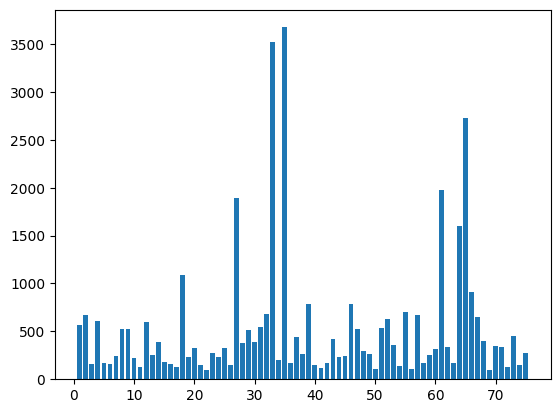

In [ ]:
# Summarize distribution
counter = Counter(y)
for k, v in counter.items():
    per = v / len(y) * 100
    print('Kode Industri=%d, n=%d (%.3f%%)' % (k, v, per))

# Plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
# Hitung rata-rata
mean_label_count = sum(class_counts.values()) / len(class_counts)

print("Rata-rata distribusi label sebelum resampling:", mean_label_count)

Rata-rata distribusi label sebelum resampling: 530.2533333333333


In [ ]:
# Tentukan threshold handling imbalanced data
threshold = mean_label_count = math.ceil(mean_label_count)
threshold

531

## **Handling Imbalanced Data**

### **SMOTE and Cluster Centroids**

In [ ]:
# Buat sampling strategy untuk SMOTE dan ClusterCentroids
smote_strategy_Cc = {cls: threshold for cls, count in class_counts.items() if count < threshold}
under_strategy_Cc  = {cls: threshold for cls, count in class_counts.items() if count > threshold}

# Buat pipeline untuk resampling
resampling_pipeline_Cc = Pipeline([
    ('oversample', SMOTE(sampling_strategy=smote_strategy_Cc)),
    ('undersample', ClusterCentroids(sampling_strategy=under_strategy_Cc))
])

# Terapkan pipeline resampling ke data
X_resampled_Cc , y_resampled_Cc  = resampling_pipeline_Cc.fit_resample(X, y)

# Buat DataFrame hasil resampling
df_resampled_Cc  = pd.DataFrame(X_resampled_Cc, columns=X.columns)
df_resampled_Cc ['nama_industri_encoded'] = y_resampled_Cc

# Tampilkan distribusi label setelah resampling
print("Distribusi label setelah resampling:", Counter(y_resampled_Cc))

Distribusi label setelah resampling: Counter({1: 531, 2: 531, 3: 531, 4: 531, 5: 531, 6: 531, 7: 531, 8: 531, 9: 531, 10: 531, 11: 531, 12: 531, 13: 531, 14: 531, 15: 531, 16: 531, 17: 531, 18: 531, 19: 531, 20: 531, 21: 531, 22: 531, 23: 531, 24: 531, 25: 531, 26: 531, 27: 531, 28: 531, 29: 531, 30: 531, 31: 531, 32: 531, 33: 531, 34: 531, 35: 531, 36: 531, 37: 531, 38: 531, 39: 531, 40: 531, 41: 531, 42: 531, 43: 531, 44: 531, 45: 531, 46: 531, 47: 531, 48: 531, 49: 531, 50: 531, 51: 531, 52: 531, 53: 531, 54: 531, 55: 531, 56: 531, 57: 531, 58: 531, 59: 531, 60: 531, 61: 531, 62: 531, 63: 531, 64: 531, 65: 531, 66: 531, 67: 531, 68: 531, 69: 531, 70: 531, 71: 531, 72: 531, 73: 531, 74: 531, 75: 531})


### **SMOTE and Near Miss**

In [ ]:
# Buat sampling strategy untuk SMOTE dan NearMiss
smote_strategy_Nm = {cls: threshold for cls, count in class_counts.items() if count < threshold}
under_strategy_Nm = {cls: threshold for cls, count in class_counts.items() if count > threshold}

# Buat pipeline untuk resampling
resampling_pipeline_Nm = Pipeline([
    ('smote', SMOTE(sampling_strategy=smote_strategy_Nm)),
    ('nearmiss', NearMiss(sampling_strategy=under_strategy_Nm))
])

# Terapkan pipeline resampling ke data
X_resampled_Nm, y_resampled_Nm = resampling_pipeline_Nm.fit_resample(X, y)

# Buat DataFrame hasil resampling
df_resampled_Nm = pd.DataFrame(X_resampled_Nm, columns=X.columns)
df_resampled_Nm['nama_industri_encoded'] = y_resampled_Nm

# Tampilkan distribusi label setelah resampling
print("Distribusi label setelah resampling:", Counter(y_resampled_Nm))

Distribusi label setelah resampling: Counter({1: 531, 2: 531, 3: 531, 4: 531, 5: 531, 6: 531, 7: 531, 8: 531, 9: 531, 10: 531, 11: 531, 12: 531, 13: 531, 14: 531, 15: 531, 16: 531, 17: 531, 18: 531, 19: 531, 20: 531, 21: 531, 22: 531, 23: 531, 24: 531, 25: 531, 26: 531, 27: 531, 28: 531, 29: 531, 30: 531, 31: 531, 32: 531, 33: 531, 34: 531, 35: 531, 36: 531, 37: 531, 38: 531, 39: 531, 40: 531, 41: 531, 42: 531, 43: 531, 44: 531, 45: 531, 46: 531, 47: 531, 48: 531, 49: 531, 50: 531, 51: 531, 52: 531, 53: 531, 54: 531, 55: 531, 56: 531, 57: 531, 58: 531, 59: 531, 60: 531, 61: 531, 62: 531, 63: 531, 64: 531, 65: 531, 66: 531, 67: 531, 68: 531, 69: 531, 70: 531, 71: 531, 72: 531, 73: 531, 74: 531, 75: 531})


### **SMOTE and Tomek Links**

In [ ]:
# Buat sampling strategy untuk SMOTE dan Tomek Links
smote_strategy_Tl = {cls: threshold for cls, count in class_counts.items() if count < threshold}
under_strategy_Tl = {cls: threshold for cls, count in class_counts.items() if count > threshold}

# Buat pipeline untuk resampling
resampling_pipeline_Tl = Pipeline([
    ('smote', SMOTE(sampling_strategy=smote_strategy_Tl)),
    ('tomek', TomekLinks())
])

# Terapkan pipeline resampling ke data
X_resampled_Tl, y_resampled_Tl = resampling_pipeline_Tl.fit_resample(X, y)

# Buat DataFrame hasil resampling
df_resampled_Tl = pd.DataFrame(X_resampled_Tl, columns=X.columns)
df_resampled_Tl['nama_industri_encoded'] = y_resampled_Tl

# Tampilkan distribusi label setelah resampling
print("Distribusi label setelah resampling:", Counter(y_resampled_Tl))

Distribusi label setelah resampling: Counter({33: 2988, 35: 2762, 65: 2346, 61: 1706, 27: 1368, 64: 1160, 18: 783, 66: 679, 67: 576, 39: 547, 32: 539, 3: 531, 40: 529, 57: 514, 46: 510, 10: 508, 2: 501, 72: 482, 55: 470, 15: 462, 60: 460, 41: 456, 48: 452, 54: 449, 63: 438, 25: 437, 23: 435, 22: 431, 17: 428, 68: 424, 11: 424, 74: 423, 50: 421, 26: 420, 31: 419, 20: 419, 59: 418, 36: 416, 1: 411, 24: 409, 42: 409, 52: 408, 21: 408, 69: 408, 19: 407, 34: 407, 13: 407, 49: 407, 16: 406, 71: 404, 70: 403, 28: 403, 56: 403, 45: 401, 75: 399, 12: 398, 53: 396, 62: 394, 38: 394, 8: 388, 6: 387, 30: 383, 5: 380, 51: 379, 14: 375, 7: 374, 43: 369, 58: 369, 29: 364, 47: 363, 44: 359, 4: 353, 73: 349, 9: 340, 37: 327})


### **SMOTE and One Sided Selection**

In [ ]:
# Buat sampling strategy untuk SMOTE dan OSS
smote_strategy_Oss = {cls: threshold for cls, count in class_counts.items() if count < threshold}
under_strategy_Oss = {cls: threshold for cls, count in class_counts.items() if count > threshold}

# Buat pipeline untuk resampling
resampling_pipeline_Oss = Pipeline([
    ('smote', SMOTE(sampling_strategy=smote_strategy_Oss)),
    ('oss', OneSidedSelection(sampling_strategy='auto', n_neighbors=1, n_seeds_S=200))
])

# Terapkan pipeline resampling ke data
X_resampled_Oss, y_resampled_Oss = resampling_pipeline_Oss.fit_resample(X, y)

# Buat DataFrame hasil resampling
df_resampled_Oss = pd.DataFrame(X_resampled_Oss, columns=X.columns)
df_resampled_Oss['nama_industri_encoded'] = y_resampled_Oss

# Tampilkan distribusi label setelah resampling
print("Distribusi label setelah resampling:", Counter(y_resampled_Oss))

Distribusi label setelah resampling: Counter({35: 1570, 33: 1512, 27: 773, 65: 767, 61: 625, 64: 586, 3: 531, 18: 420, 55: 348, 46: 338, 39: 301, 8: 299, 66: 295, 9: 293, 57: 292, 2: 279, 32: 278, 1: 272, 28: 269, 52: 266, 68: 263, 30: 260, 60: 260, 43: 259, 29: 258, 53: 256, 7: 255, 56: 253, 67: 253, 6: 251, 4: 247, 5: 245, 31: 245, 75: 245, 12: 244, 14: 244, 63: 244, 62: 242, 16: 241, 22: 238, 36: 238, 49: 238, 50: 237, 19: 236, 26: 236, 59: 234, 74: 234, 17: 233, 38: 233, 15: 232, 25: 232, 51: 232, 54: 232, 23: 231, 41: 231, 69: 231, 71: 231, 48: 230, 20: 228, 24: 227, 34: 226, 70: 226, 45: 224, 44: 223, 42: 221, 72: 220, 21: 219, 13: 217, 58: 216, 10: 214, 11: 208, 73: 208, 40: 201, 37: 195, 47: 143})


In [ ]:
# # Jika ingin menyimpan hasil ke file CSV
# df_resampled_Cc.to_csv('../Dataset/data_FP/Cresampled_data_Cc.csv', index=False)
# df_resampled_Nm.to_csv('../Dataset/data_FP/Cresampled_data_Nm.csv', index=False)
# df_resampled_Tl.to_csv('../Dataset/data_FP/Cresampled_data_Tl.csv', index=False)
# df_resampled_Oss.to_csv('../Dataset/data_FP/Cresampled_data_Oss.csv', index=False)

# EDA

## Loading Dataset

In [ ]:
import pandas as pd

# URL dataset
url = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_outliers/Cclean_outliers.csv'

In [ ]:
df = pd.read_csv(url)

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Distinguish Attributes

In [ ]:
# menampilkan beberapa baris pertama dataset
print(df.head)

<bound method NDFrame.head of        id_pekerjaan  id_perusahaan  \
0        3757940104       553718.0   
1        3757940025      2192142.0   
2        3757938019       474443.0   
3        3757938018     18213359.0   
4        3757937095       437225.0   
...             ...            ...   
39764     133196985      1089558.0   
39765     133114754     77766802.0   
39766     108965123            0.0   
39767     102339515     52132271.0   
39768      85008768            0.0   

                                                   judul  \
0                                  Hearing Care Provider   
1      Shipping & Receiving Associate 2nd shift (Beav...   
2                                   Manager, Engineering   
3                                                   Cook   
4            Principal Cloud Security Architect (Remote)   
...                                                  ...   
39764                                 Model Risk Auditor   
39765                            

In [ ]:
# menampilkan informasi dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39769 entries, 0 to 39768
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pekerjaan                  39769 non-null  int64  
 1   id_perusahaan                 39769 non-null  float64
 2   judul                         39769 non-null  object 
 3   gaji_rata-rata_perbulan       39769 non-null  float64
 4   periode_pembayaran            39769 non-null  object 
 5   jenis_pekerjaan_terformat     39769 non-null  object 
 6   lamaran                       39769 non-null  float64
 7   diperbolehkan_jarak_jauh      39769 non-null  float64
 8   tipe_pendaftaran              39769 non-null  object 
 9   tingkat_pengalaman_terformat  39769 non-null  object 
 10  jenis_pekerjaan               39769 non-null  object 
 11  mata_uang                     39769 non-null  object 
 12  tipe_kompensasi               39769 non-null  object 
 13  i

In [ ]:
# menampilkan statistik deskriptif
df.describe()

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan
count,3.976900e+04,3.976900e+04,39769.000000,39769.000000,39769.000000,39769.000000,39769.000000
mean,3.723480e+09,1.046980e+07,7531.284044,3.227149,0.145893,58.713898,6780.479293
std,8.643187e+07,2.305166e+07,2988.381847,4.651692,0.353003,85.150985,9238.024818
min,8.500877e+07,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.697376e+09,1.307400e+04,5416.666667,0.000000,0.000000,15.000000,185.000000
50%,3.748845e+09,2.693970e+05,7208.333333,1.000000,0.000000,44.000000,1581.000000
75%,3.756905e+09,5.047520e+06,9166.666667,5.000000,0.000000,96.000000,10316.000000
max,3.757940e+09,1.011741e+08,14791.666667,12.500000,1.000000,1285.000000,25512.500000


## Univariate Analysis

### Numerical Features

In [ ]:
def plot_numeric_columns_histogram_subplots(data):
    numeric_columns = data.select_dtypes(include='number').columns
    num_plots = len(numeric_columns)
    num_cols = 4
    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(30, 45))

    for i, column in enumerate(numeric_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]

        sns.histplot(data[column], kde=True, ax=ax, color='skyblue')
        ax.set_title(f'Histogram of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.grid(False)

    for i in range(num_plots, num_rows * num_cols):
        plt.delaxes(plt.subplot(num_rows, num_cols, i + 1))

    plt.show()

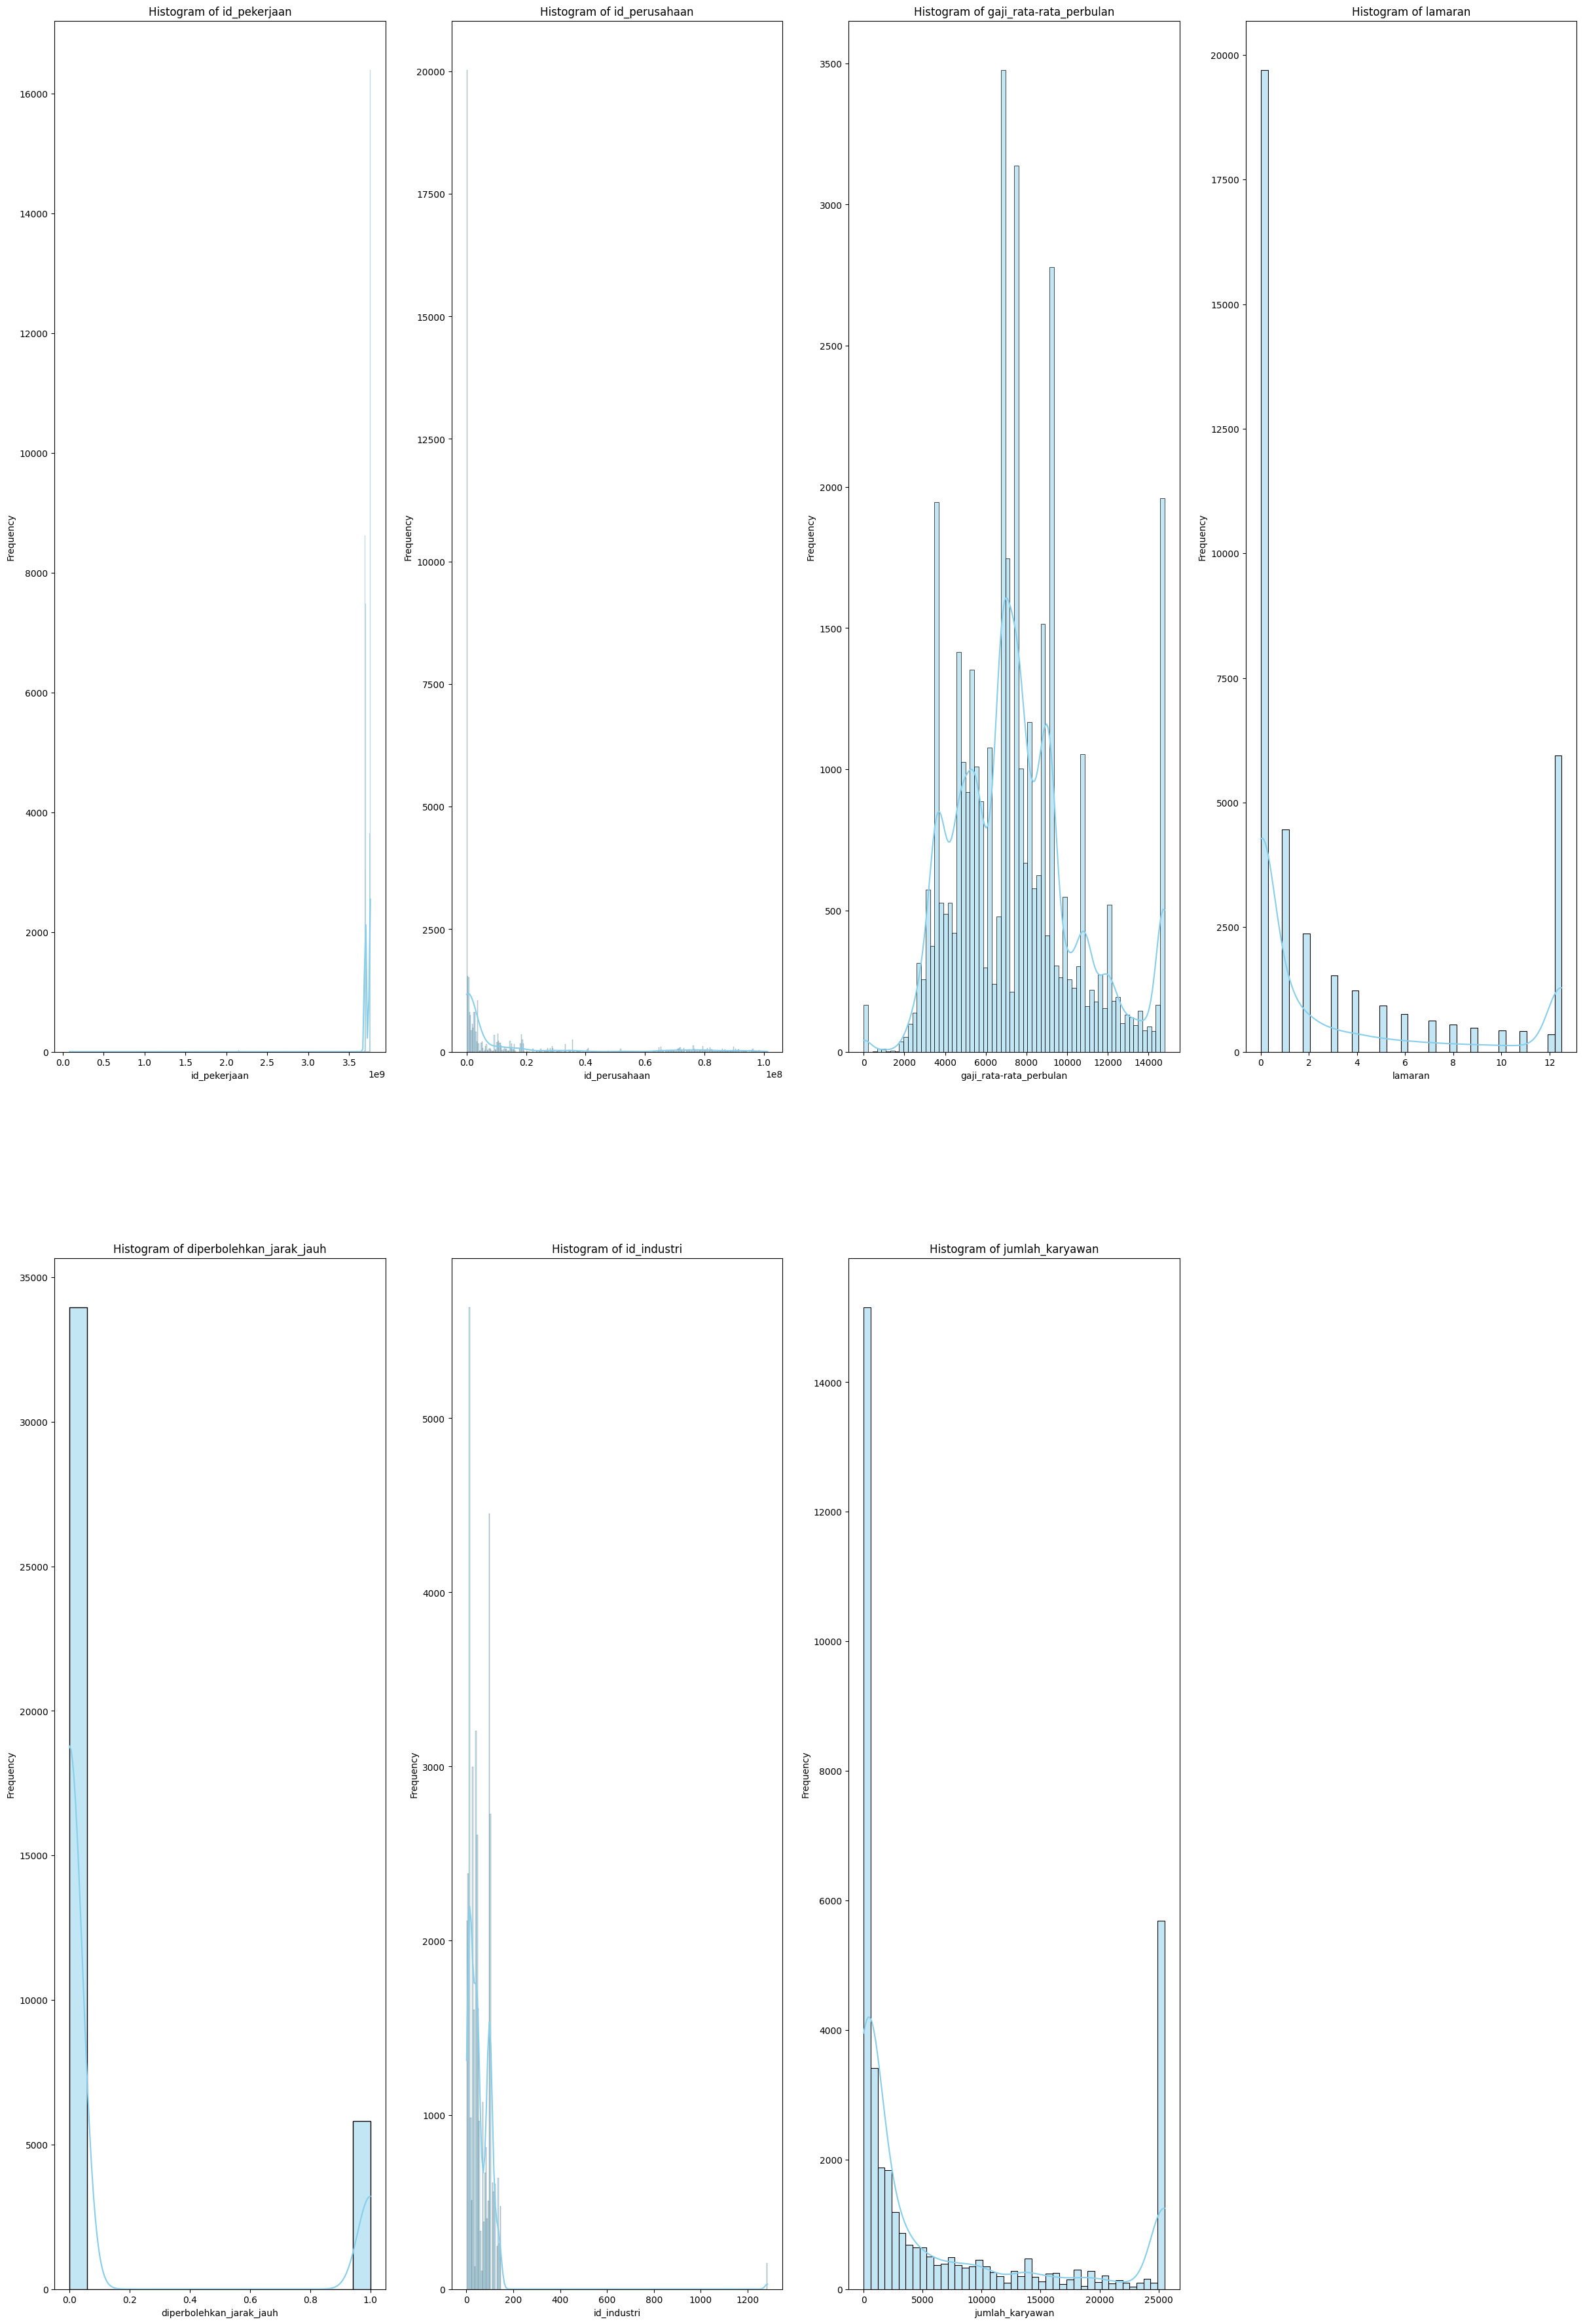

In [ ]:
plot_numeric_columns_histogram_subplots(df)

## Multivariate Analysis

In [ ]:
import pandas as pd

# URL dataset
url1 = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_encoding/Cdata_encoding.csv'

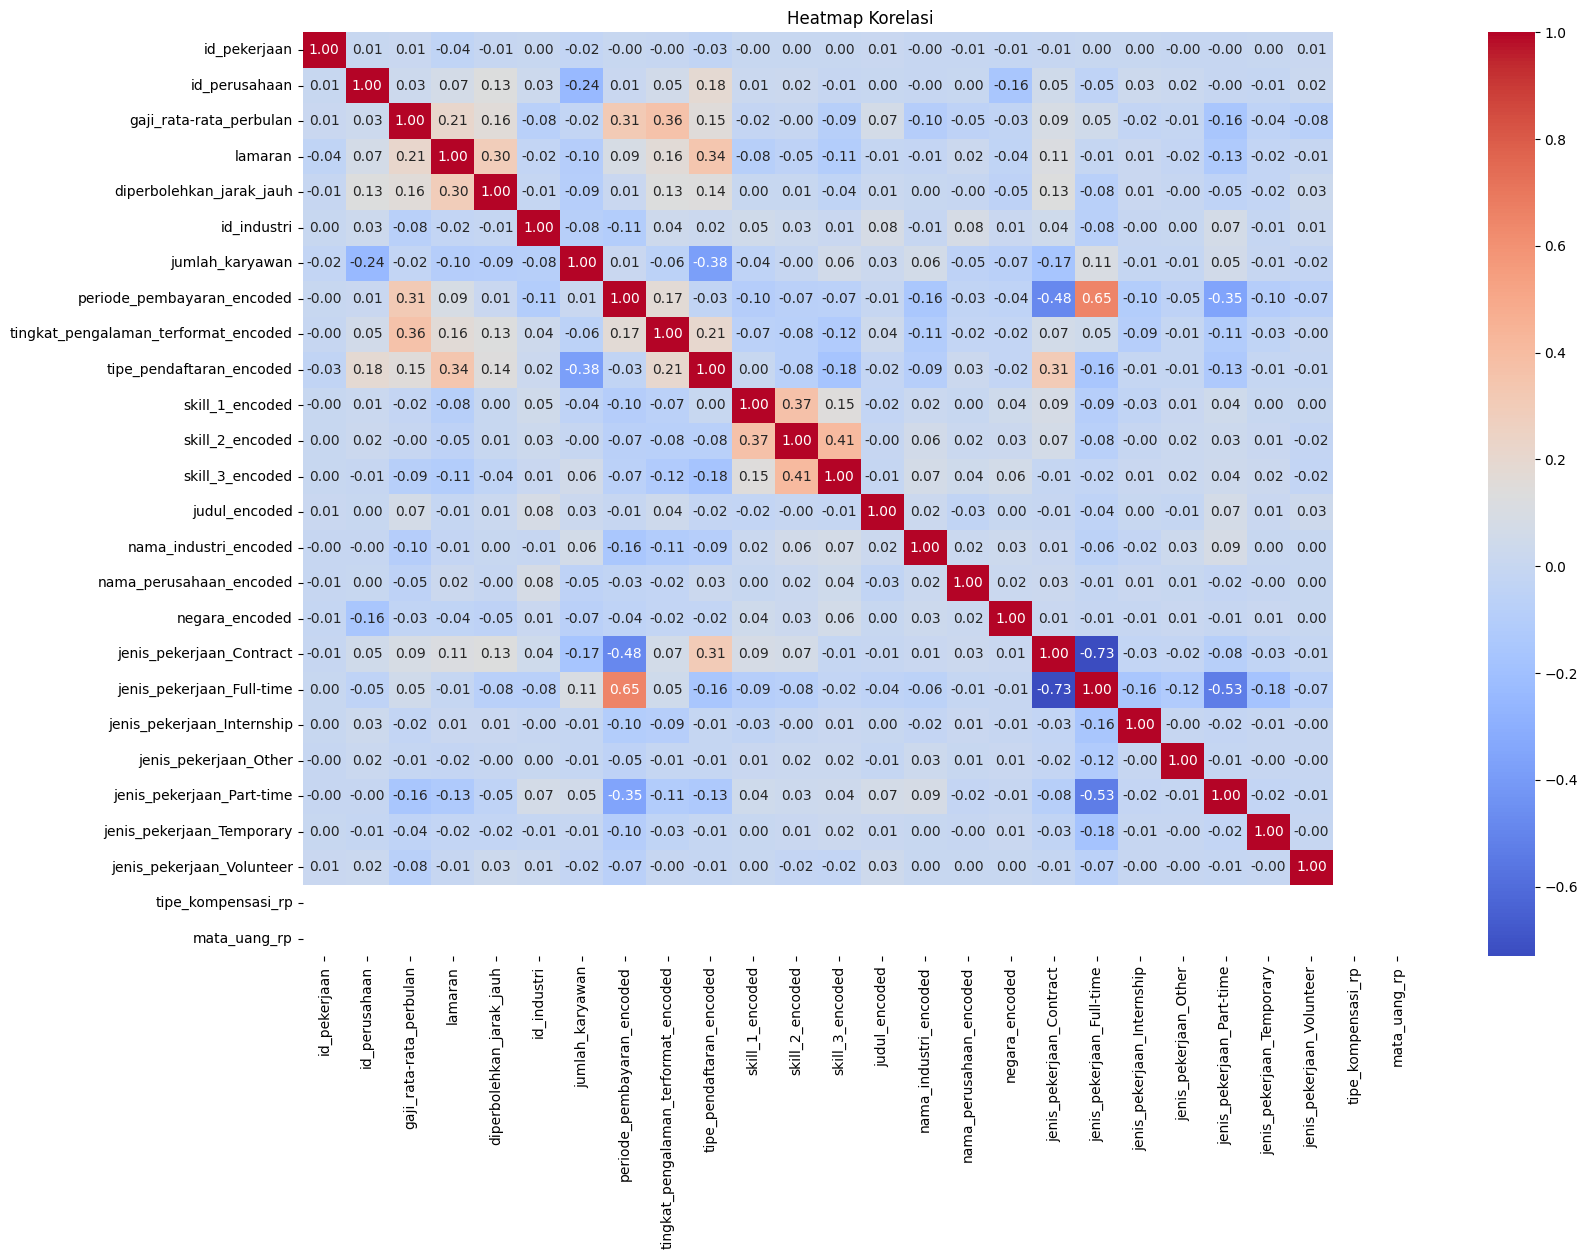

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv(url1)

correlation_matrix = df1.corr()

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

## Bivariate Analysis

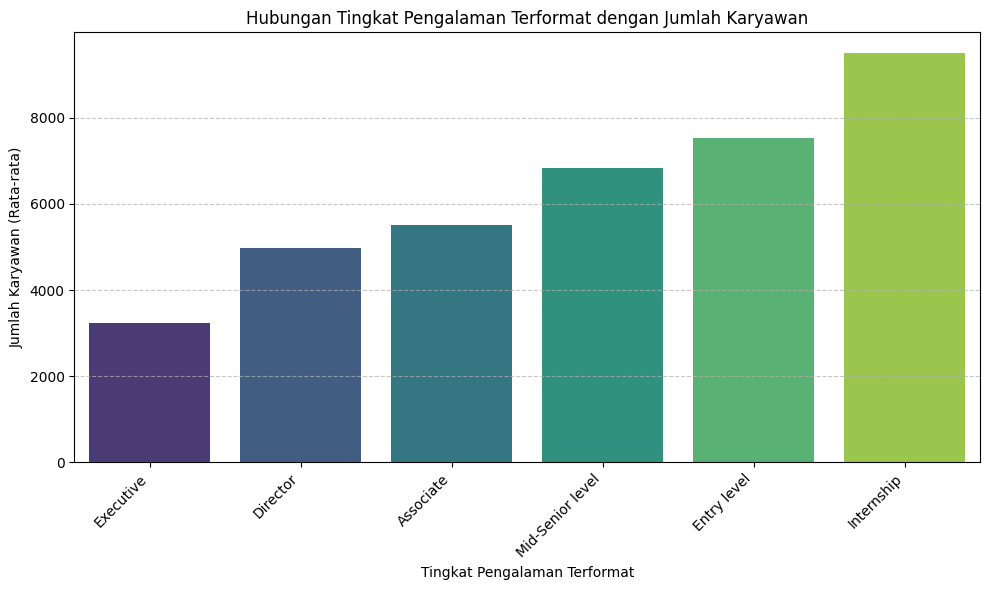

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan tingkat pengalaman terformat
grouped_data = df.groupby('tingkat_pengalaman_terformat')['jumlah_karyawan'].mean()

# Mengurutkan data berdasarkan tingkat pengalaman terformat
grouped_data = grouped_data.sort_values()

# Membuat bar chart dengan Seaborn's style
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='viridis')
plt.title('Hubungan Tingkat Pengalaman Terformat dengan Jumlah Karyawan')
plt.xlabel('Tingkat Pengalaman Terformat')
plt.ylabel('Jumlah Karyawan (Rata-rata)')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari data tersebut dapat disimpulkan bahwa hubungan tingkat pengalaman terformat dengan jumlah karyawan paling tinggi yaitu tingkat pengalaman intership dengan jumlah karyawan lebih dari 8000 karyawan, kemudian disusul entry level dengan jumlah karyawan kisaran 7000 lebih karyawan, kemudian mid senior level yang lebih dari 6000 karyawan, associate, director dan yang terakhir yaitu executive dengan jumlah karyawan paling rendah yaitu sekitar 3000 karyawan.

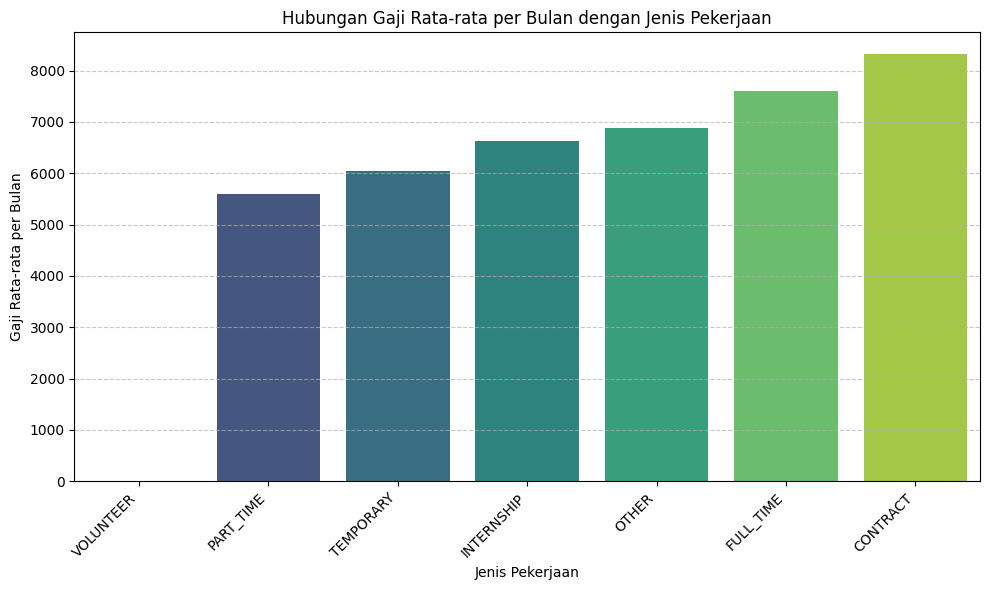

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan jenis pekerjaan dan menghitung rata-rata gaji per bulan
grouped_data = df.groupby('jenis_pekerjaan')['gaji_rata-rata_perbulan'].mean()

# Mengurutkan data berdasarkan gaji rata-rata per bulan
grouped_data = grouped_data.sort_values()

# Membuat bar chart dengan Seaborn's style
plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='viridis')
plt.title('Hubungan Gaji Rata-rata per Bulan dengan Jenis Pekerjaan')
plt.xlabel('Jenis Pekerjaan')
plt.ylabel('Gaji Rata-rata per Bulan')
plt.xticks(rotation=45, ha='right')  # Memutar label sumbu x agar lebih mudah dibaca
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Dari data data diatas dapat disimpulkan hubungan gaji rata-rata per bulan dengan jenis pekerjaan paling tinggi yaitu jenis pekerjaan kontrak lebih dari 8000 kemudian disusul full time dengan lebih dari 7000 dan other, intership, temporary, part time dan yang terakhir volunteer yang kurang dari 1000.

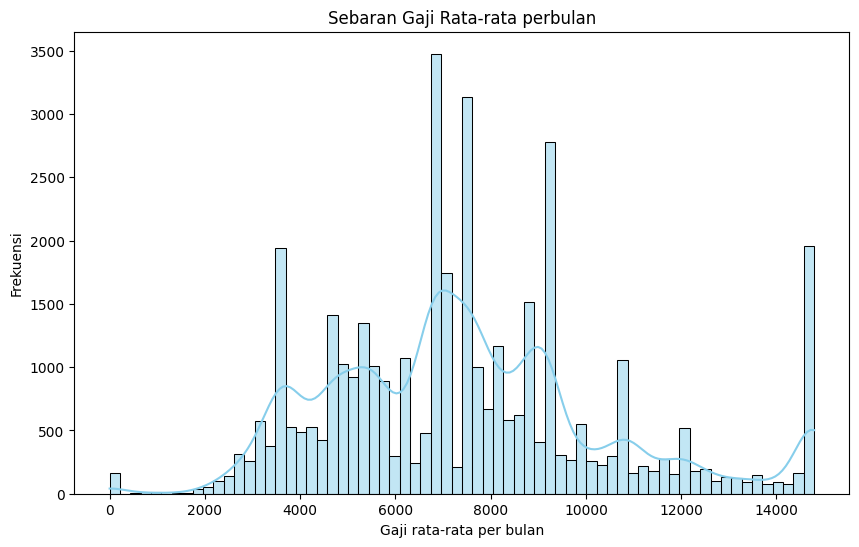

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk distribusi gaji rata-rata per bulan
plt.figure(figsize=(10, 6))
sns.histplot(df['gaji_rata-rata_perbulan'], kde=True, color='skyblue')
plt.title('Sebaran Gaji Rata-rata perbulan')
plt.xlabel('Gaji rata-rata per bulan')
plt.ylabel('Frekuensi')
plt.show()

Kesimpulan: Mayoritas lowongan menyediakan gaji antara 4000 hingga 6000, ada beberapa kelompok lowongan yang menawarkan gaji lebih tinggi, dengan distribusi yang menurun seiring dengan peningkatan gaji, grafik ini juga menunjukkan bahwa distribusi gaji cenderung normal tidak miring ke kanan maupun kiri

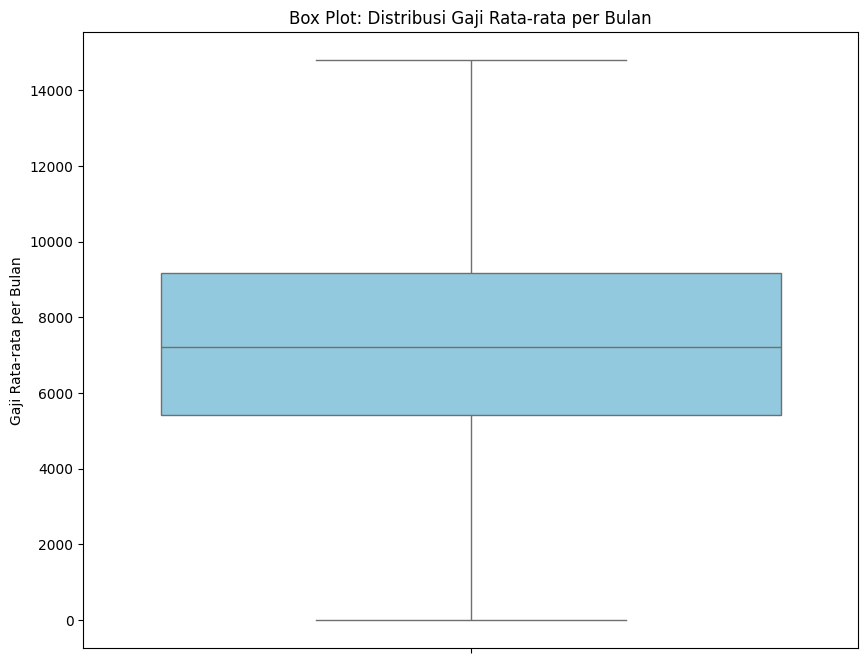

In [ ]:
# Box Plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, y='gaji_rata-rata_perbulan', color='skyblue')
plt.title('Box Plot: Distribusi Gaji Rata-rata per Bulan')
plt.ylabel('Gaji Rata-rata per Bulan')
plt.show()

Boxplot tersebut menunjukkan bahwa rata-rata gaji sebulan adalah pada rentang 5000-9000 USD.

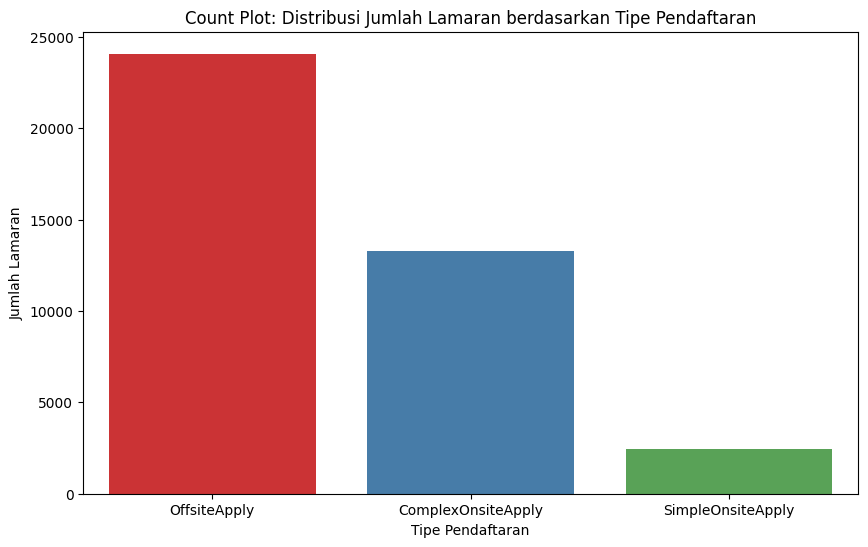

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah setiap tipe pendaftaran dan mengurutkannya
tipe_counts = df['tipe_pendaftaran'].value_counts().reset_index()
tipe_counts.columns = ['tipe_pendaftaran', 'jumlah']
tipe_counts = tipe_counts.sort_values(by='jumlah', ascending=False)

# Membuat plot batang dengan urutan yang telah ditentukan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tipe_pendaftaran', order=tipe_counts['tipe_pendaftaran'], palette='Set1')
plt.title('Count Plot: Distribusi Jumlah Lamaran berdasarkan Tipe Pendaftaran')
plt.xlabel('Tipe Pendaftaran')
plt.ylabel('Jumlah Lamaran')
plt.show()

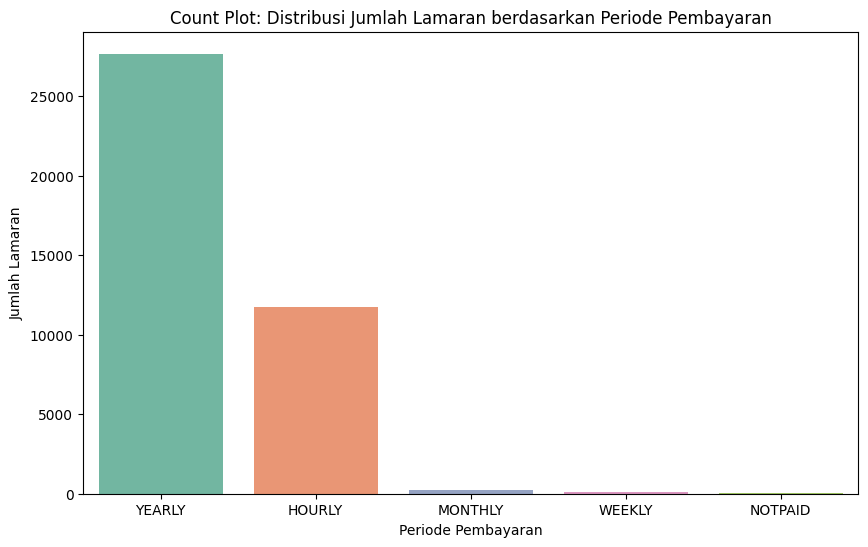

In [ ]:
# Menghitung jumlah setiap periode pembayaran dan mengurutkannya
periode_counts = df['periode_pembayaran'].value_counts().reset_index()
periode_counts.columns = ['periode_pembayaran', 'jumlah']
periode_counts = periode_counts.sort_values(by='jumlah', ascending=False)

# Membuat plot batang dengan urutan yang telah ditentukan
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='periode_pembayaran', order=periode_counts['periode_pembayaran'], palette='Set2')
plt.title('Count Plot: Distribusi Jumlah Lamaran berdasarkan Periode Pembayaran')
plt.xlabel('Periode Pembayaran')
plt.ylabel('Jumlah Lamaran')
plt.show()

Kesimpulan: Hasil dari count plot: Distribusi jumlah lamaran berdasarkan periode pembayaran paling besar dengan periode pembayaran tahunan dengan jumlah lamaran lebih dari 25000 lamaran, kemudian periode pembayaran hourly dengan jumlah lamaran lebih dari 10000 lamaran, disusul monthly, weekly dan yang terakhir notpaid.

Count plot: Distribusi jumlah lamaran berdasarkan tipe pendaftaran Dari hasil tersebut dapat disimpulkan bahwa tipe pendaftaran OffsiteApply lebih banyak digemari dengan jumlah lamaran lebih dari 20.000 hampir 25.000 lamaran, yang kedua yaitu tipe pendaftaran ComplexOnsiteApply dengan lebih dari 13.000 jumlah lamaran dan yang terakhir yaitu tipe pendaftaran SimpleOnsiteApply dengan jumlah lamaran terendah yaitu dibawah 5000 jumlah lamaran.

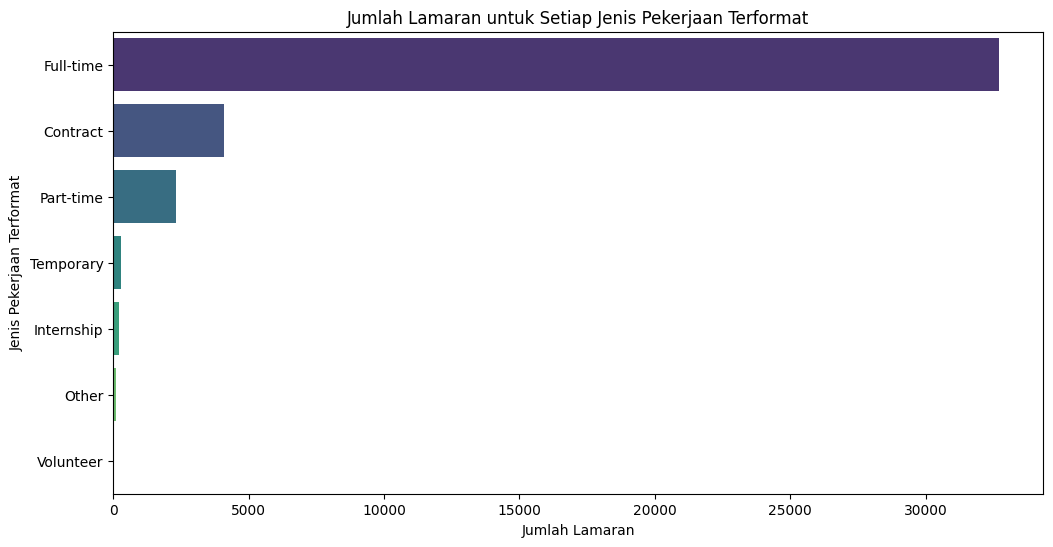

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung jumlah lamaran untuk setiap jenis pekerjaan terformat
job_counts = df['jenis_pekerjaan_terformat'].value_counts()

# Mengubah hasil hitungan menjadi DataFrame dan mengurutkannya
job_counts = job_counts.reset_index()
job_counts.columns = ['jenis_pekerjaan_terformat', 'jumlah']
job_counts = job_counts.sort_values(by='jumlah', ascending=False)

# Membuat plot batang dengan data yang telah diurutkan
plt.figure(figsize=(12, 6))
sns.barplot(data=job_counts, y='jenis_pekerjaan_terformat', x='jumlah', palette='viridis')
plt.title('Jumlah Lamaran untuk Setiap Jenis Pekerjaan Terformat')
plt.xlabel('Jumlah Lamaran')
plt.ylabel('Jenis Pekerjaan Terformat')
plt.show()


Dari jumlah lamaran untuk setiap jenis pekerjaan terformat data diatas dapat disimpulan bahwa jenis pekerjaan kontrak (full time) memiliki jumlah lamaran paling banyak yaitu lebih dari 3000 lamaran, kedua dengan jenis pekerjaan kontrak (contack) sebesar hampir 5000 jumlah lamaran, disusul part time, temporary, internship other dan terakhir volunteer dengan jumlah lamaran paling sedikit yaitu kurang dari 1000 lamaran.

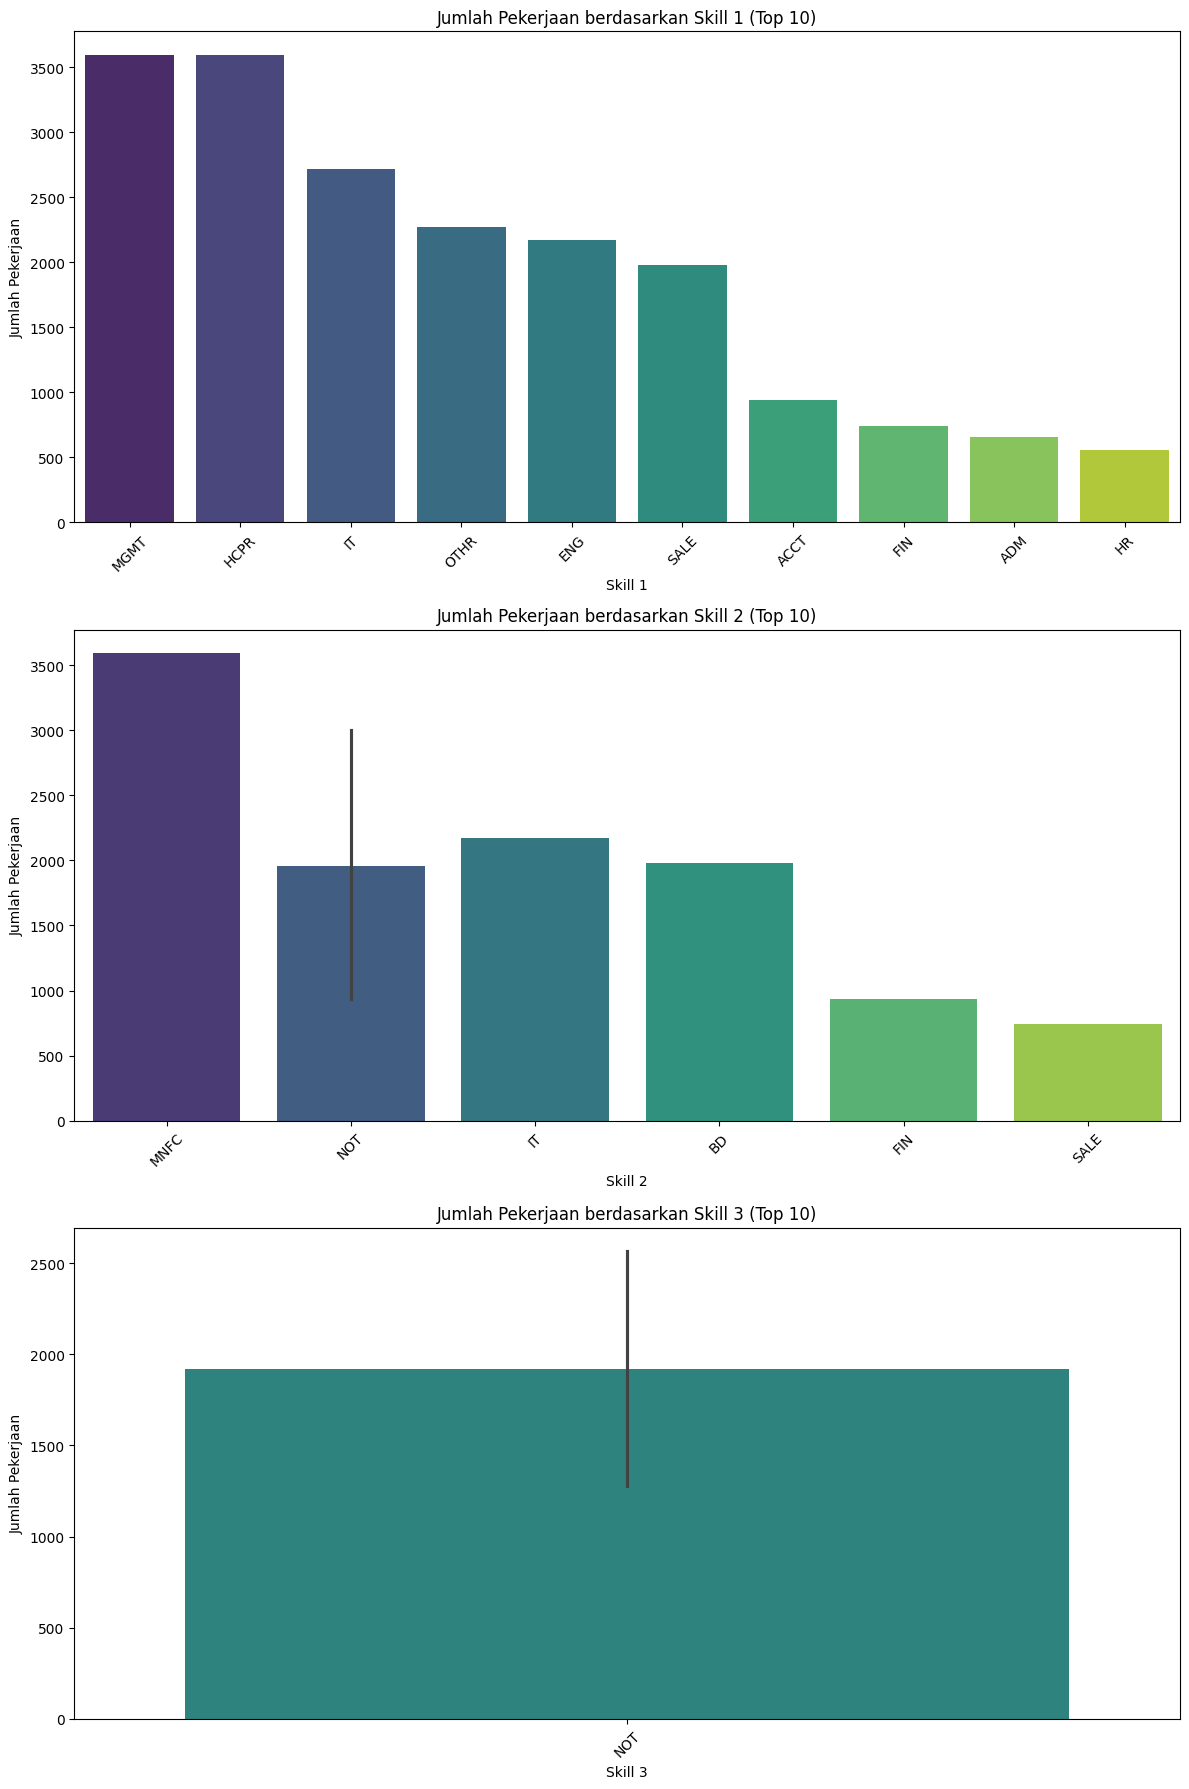

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengelompokkan data berdasarkan skill 1, 2, dan 3, dan menghitung jumlah lamaran
grouped_data = df.groupby(['skill_1', 'skill_2', 'skill_3'])['id_pekerjaan'].nunique().reset_index()

# Mengurutkan data berdasarkan jumlah lamaran secara descending
grouped_data = grouped_data.sort_values(by='id_pekerjaan', ascending=False)

# Memilih 10 entri teratas untuk divisualisasikan
top_skills = grouped_data.head(10)

# Membuat subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 18))

# Plot untuk skill 1
sns.barplot(data=top_skills, x='skill_1', y='id_pekerjaan', ax=axes[0], palette='viridis')
axes[0].set_title('Jumlah Pekerjaan berdasarkan Skill 1 (Top 10)')
axes[0].set_xlabel('Skill 1')
axes[0].set_ylabel('Jumlah Pekerjaan')
axes[0].tick_params(axis='x', rotation=45)

# Plot untuk skill 2
sns.barplot(data=top_skills, x='skill_2', y='id_pekerjaan', ax=axes[1], palette='viridis')
axes[1].set_title('Jumlah Pekerjaan berdasarkan Skill 2 (Top 10)')
axes[1].set_xlabel('Skill 2')
axes[1].set_ylabel('Jumlah Pekerjaan')
axes[1].tick_params(axis='x', rotation=45)

# Plot untuk skill 3
sns.barplot(data=top_skills, x='skill_3', y='id_pekerjaan', ax=axes[2], palette='viridis')
axes[2].set_title('Jumlah Pekerjaan berdasarkan Skill 3 (Top 10)')
axes[2].set_xlabel('Skill 3')
axes[2].set_ylabel('Jumlah Pekerjaan')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Pada skill 1 dapat diperhatikan bahwa management dan health care memiliki jumlah lowongan paling banyak pertama untuk skill 1. Kemudian disusul dengan skill IT. Pada Skill 2 Manufacturing memiliki juml;ah pekerjaan  yang sama dengan management dan health care sebanyak 3500. Sedangkan skill ke 3 paling banyak NOT menunjukan pekerjaan mayoritas menginginkan 2 skill untuk utamanya. Ada hal yang menrik dalam plot ini skill IT meskipun tidak menjadi yang paling banyak namun selalu muncul pada skill 1 dan 2 menunjukan mayoritas lowongan kerja membutuhkan skill IT.

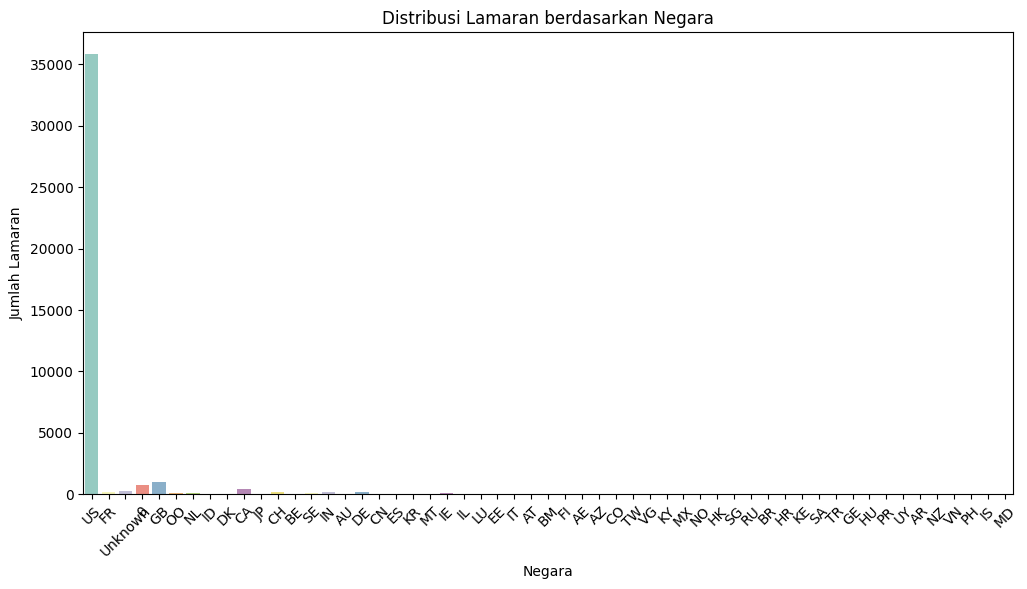

In [ ]:
# Bar Plot untuk negara
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='negara', palette='Set3')
plt.title('Distribusi Lamaran berdasarkan Negara')
plt.xlabel('Negara')
plt.ylabel('Jumlah Lamaran')
plt.xticks(rotation=45)  # Rotasi label sumbu x agar mudah dibaca
plt.show()

Negara dengan jumlah lamaran paling banyak berdasarkan negara yaitu berada di US

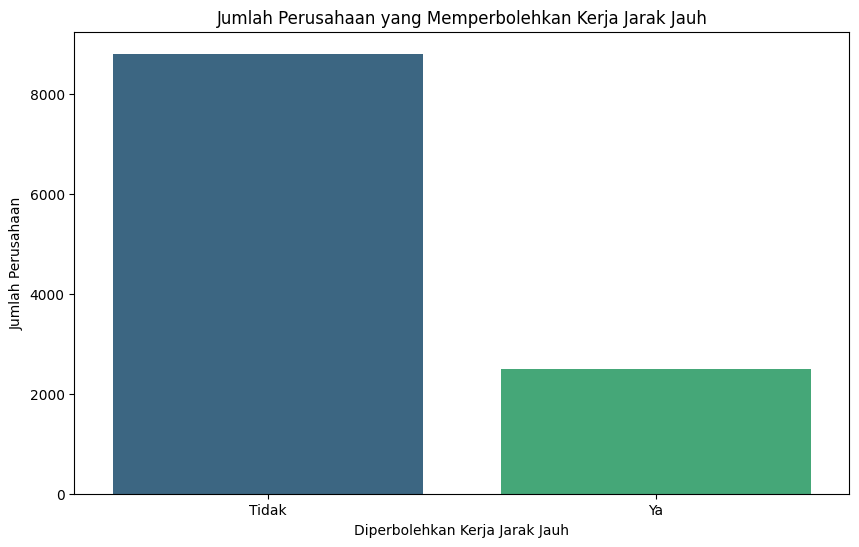

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah perusahaan unik berdasarkan izin kerja jarak jauh
remote_work_counts = df.groupby('diperbolehkan_jarak_jauh')['id_perusahaan'].nunique().reset_index()

# Mengubah nilai biner menjadi label kategorikal
remote_work_counts['diperbolehkan_jarak_jauh'] = remote_work_counts['diperbolehkan_jarak_jauh'].map({0: 'Tidak', 1: 'Ya'})

# Mengganti nama kolom untuk kejelasan
remote_work_counts.columns = ['Diperbolehkan Kerja Jarak Jauh', 'Jumlah Perusahaan']

# Membuat plot batang
plt.figure(figsize=(10, 6))
sns.barplot(data=remote_work_counts, x='Diperbolehkan Kerja Jarak Jauh', y='Jumlah Perusahaan', palette='viridis')
plt.title('Jumlah Perusahaan yang Memperbolehkan Kerja Jarak Jauh')
plt.xlabel('Diperbolehkan Kerja Jarak Jauh')
plt.ylabel('Jumlah Perusahaan')
plt.show()

Mayoritas perusahaan membuka lamaran untuk pekerjaan WFO dari padas WFH/WFA. Hanya ada kurang dari 3000 perusahaan yang membuka lowongan WFA/WFH

# Feature Engineering

In [ ]:
df_balanced = pd.read_csv("https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_resampling/Cresampled_data_Nm.csv")
df_balanced.head()

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,jenis_pekerjaan_Contract,jenis_pekerjaan_Full-time,jenis_pekerjaan_Internship,jenis_pekerjaan_Other,jenis_pekerjaan_Part-time,jenis_pekerjaan_Temporary,jenis_pekerjaan_Volunteer,tipe_kompensasi_rp,mata_uang_rp,nama_industri_encoded
0,3757450575,777243,7500.0,0,False,47,329,5,3,3,...,0,1,0,0,0,0,0,1,1,1
1,3757450529,777243,7500.0,0,False,47,329,5,4,3,...,0,1,0,0,0,0,0,1,1,1
2,3757451167,777243,7500.0,1,False,47,329,5,3,3,...,0,1,0,0,0,0,0,1,1,1
3,3757449609,777243,7500.0,0,False,47,329,5,3,3,...,0,1,0,0,0,0,0,1,1,1
4,3757449600,777243,7500.0,1,False,47,329,5,3,3,...,0,1,0,0,0,0,0,1,1,1


In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39825 entries, 0 to 39824
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_pekerjaan                          39825 non-null  int64  
 1   id_perusahaan                         39825 non-null  int64  
 2   gaji_rata-rata_perbulan               39825 non-null  float64
 3   lamaran                               39825 non-null  int64  
 4   diperbolehkan_jarak_jauh              39825 non-null  bool   
 5   id_industri                           39825 non-null  int64  
 6   jumlah_karyawan                       39825 non-null  int64  
 7   periode_pembayaran_encoded            39825 non-null  int64  
 8   tingkat_pengalaman_terformat_encoded  39825 non-null  int64  
 9   tipe_pendaftaran_encoded              39825 non-null  int64  
 10  skill_1_encoded                       39825 non-null  int64  
 11  skill_2_encoded

In [ ]:
df_balanced.columns

Index(['id_pekerjaan', 'id_perusahaan', 'gaji_rata-rata_perbulan', 'lamaran',
       'diperbolehkan_jarak_jauh', 'id_industri', 'jumlah_karyawan',
       'periode_pembayaran_encoded', 'tingkat_pengalaman_terformat_encoded',
       'tipe_pendaftaran_encoded', 'skill_1_encoded', 'skill_2_encoded',
       'skill_3_encoded', 'judul_encoded', 'nama_perusahaan_encoded',
       'negara_encoded', 'jenis_pekerjaan_Contract',
       'jenis_pekerjaan_Full-time', 'jenis_pekerjaan_Internship',
       'jenis_pekerjaan_Other', 'jenis_pekerjaan_Part-time',
       'jenis_pekerjaan_Temporary', 'jenis_pekerjaan_Volunteer',
       'tipe_kompensasi_rp', 'mata_uang_rp', 'nama_industri_encoded'],
      dtype='object')

## Jumlah Skill yang Dibutuhkan

Fitur `jumlah_skill` merupakan fitur yang menghitung jumalah dari skill yang diperlukan dalam pekerjaan tersebut. Diketahui bahwa satu pekerjaan memiliki 1 hingga 3 skill, sehingga nilai unique dari fitur ini akan ada 1, 2, dan 3.

In [ ]:
skill = df_balanced[['skill_1_encoded', 'skill_2_encoded', 'skill_3_encoded']]
df_balanced['jumlah_skill'] = 0

for index, row in skill.iterrows():
    unique_skill = set()

    for value in row:
        if value != 36:
            unique_skill.add(value)

    df_balanced.at[index, 'jumlah_skill'] = len(unique_skill)

df_balanced

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,jenis_pekerjaan_Full-time,jenis_pekerjaan_Internship,jenis_pekerjaan_Other,jenis_pekerjaan_Part-time,jenis_pekerjaan_Temporary,jenis_pekerjaan_Volunteer,tipe_kompensasi_rp,mata_uang_rp,nama_industri_encoded,jumlah_skill
0,3757450575,777243,7500.000000,0,False,47,329,5,3,3,...,1,0,0,0,0,0,1,1,1,1
1,3757450529,777243,7500.000000,0,False,47,329,5,4,3,...,1,0,0,0,0,0,1,1,1,1
2,3757451167,777243,7500.000000,1,False,47,329,5,3,3,...,1,0,0,0,0,0,1,1,1,1
3,3757449609,777243,7500.000000,0,False,47,329,5,3,3,...,1,0,0,0,0,0,1,1,1,1
4,3757449600,777243,7500.000000,1,False,47,329,5,3,3,...,1,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39820,3693653869,18590818,13325.105417,7,True,49,92,5,5,2,...,1,0,0,0,0,0,1,1,75,3
39821,3755579645,96125,10868.366935,6,False,49,1882,5,4,1,...,1,0,0,0,0,0,1,1,75,3
39822,3701318204,724797,4927.722902,4,False,49,1281,5,2,1,...,1,0,0,0,0,0,1,1,75,3
39823,3755590171,109407,4342.748936,0,True,49,14616,3,3,1,...,1,0,0,0,0,0,1,1,75,3


In [ ]:
df_balanced['jumlah_skill'].unique()

array([1, 3, 2])

## Standar Gaji

Fitur `standar_gaji` merupakan standar gaji yang dihitung dari rata - rata gaji berdasarkan industri dan jenis pekerjaan (full-time atau tidak).

In [ ]:
jenis_pekerjaan = df_balanced[['jenis_pekerjaan_Contract',
       'jenis_pekerjaan_Full-time', 'jenis_pekerjaan_Internship',
       'jenis_pekerjaan_Other', 'jenis_pekerjaan_Part-time',
       'jenis_pekerjaan_Temporary', 'jenis_pekerjaan_Volunteer']]

In [ ]:
df_balanced['standar_gaji'] = df_balanced.groupby(['id_industri', jenis_pekerjaan.idxmax(axis=1), 'tingkat_pengalaman_terformat_encoded'])['gaji_rata-rata_perbulan'].transform('mean')
df_balanced

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,jenis_pekerjaan_Internship,jenis_pekerjaan_Other,jenis_pekerjaan_Part-time,jenis_pekerjaan_Temporary,jenis_pekerjaan_Volunteer,tipe_kompensasi_rp,mata_uang_rp,nama_industri_encoded,jumlah_skill,standar_gaji
0,3757450575,777243,7500.000000,0,False,47,329,5,3,3,...,0,0,0,0,0,1,1,1,1,6877.696838
1,3757450529,777243,7500.000000,0,False,47,329,5,4,3,...,0,0,0,0,0,1,1,1,1,8128.698591
2,3757451167,777243,7500.000000,1,False,47,329,5,3,3,...,0,0,0,0,0,1,1,1,1,6877.696838
3,3757449609,777243,7500.000000,0,False,47,329,5,3,3,...,0,0,0,0,0,1,1,1,1,6877.696838
4,3757449600,777243,7500.000000,1,False,47,329,5,3,3,...,0,0,0,0,0,1,1,1,1,6877.696838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39820,3693653869,18590818,13325.105417,7,True,49,92,5,5,2,...,0,0,0,0,0,1,1,75,3,10328.311452
39821,3755579645,96125,10868.366935,6,False,49,1882,5,4,1,...,0,0,0,0,0,1,1,75,3,5937.758250
39822,3701318204,724797,4927.722902,4,False,49,1281,5,2,1,...,0,0,0,0,0,1,1,75,3,4785.079399
39823,3755590171,109407,4342.748936,0,True,49,14616,3,3,1,...,0,0,0,0,0,1,1,75,3,5898.164108


## Label Gaji

Fitur `label_gaji` digunakan untuk mengelompokkan pekerjaan dengan gaji lebih tinggi, lebih rendahm atau sama  dengan standar gaji. Memiliki 3 value, yaitu :


*   Value 1 untuk gaji lebih tinggi dibandingkan standar gaji.
*   Value 2 untuk gaji sama dengan standar gaji.
*   Value 3 untuk gaji lebih rendah dibandingkan standar gaji.



In [ ]:
def label_gaji(row):
    if row['gaji_rata-rata_perbulan'] > row['standar_gaji']:
        return '3'
    elif row['gaji_rata-rata_perbulan'] == row['standar_gaji']:
        return '2'
    else:
        return '1'

# Terapkan fungsi label_gaji pada setiap baris dalam dataframe
df_balanced['label_gaji'] = df_balanced.apply(label_gaji, axis=1)

df_balanced

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,jenis_pekerjaan_Other,jenis_pekerjaan_Part-time,jenis_pekerjaan_Temporary,jenis_pekerjaan_Volunteer,tipe_kompensasi_rp,mata_uang_rp,nama_industri_encoded,jumlah_skill,standar_gaji,label_gaji
0,3757450575,777243,7500.000000,0,False,47,329,5,3,3,...,0,0,0,0,1,1,1,1,6877.696838,3
1,3757450529,777243,7500.000000,0,False,47,329,5,4,3,...,0,0,0,0,1,1,1,1,8128.698591,1
2,3757451167,777243,7500.000000,1,False,47,329,5,3,3,...,0,0,0,0,1,1,1,1,6877.696838,3
3,3757449609,777243,7500.000000,0,False,47,329,5,3,3,...,0,0,0,0,1,1,1,1,6877.696838,3
4,3757449600,777243,7500.000000,1,False,47,329,5,3,3,...,0,0,0,0,1,1,1,1,6877.696838,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39820,3693653869,18590818,13325.105417,7,True,49,92,5,5,2,...,0,0,0,0,1,1,75,3,10328.311452,3
39821,3755579645,96125,10868.366935,6,False,49,1882,5,4,1,...,0,0,0,0,1,1,75,3,5937.758250,3
39822,3701318204,724797,4927.722902,4,False,49,1281,5,2,1,...,0,0,0,0,1,1,75,3,4785.079399,3
39823,3755590171,109407,4342.748936,0,True,49,14616,3,3,1,...,0,0,0,0,1,1,75,3,5898.164108,1


In [ ]:
df_balanced['label_gaji'].unique()

array(['3', '1', '2'], dtype=object)

## Jumlah Pelamar Berdasarkan Industri

In [ ]:
df_balanced['pelamar_industri'] = df_balanced.groupby('id_industri')['lamaran'].transform('sum')

df_balanced

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,jenis_pekerjaan_Part-time,jenis_pekerjaan_Temporary,jenis_pekerjaan_Volunteer,tipe_kompensasi_rp,mata_uang_rp,nama_industri_encoded,jumlah_skill,standar_gaji,label_gaji,pelamar_industri
0,3757450575,777243,7500.000000,0,False,47,329,5,3,3,...,0,0,0,1,1,1,1,6877.696838,3,1469
1,3757450529,777243,7500.000000,0,False,47,329,5,4,3,...,0,0,0,1,1,1,1,8128.698591,1,1469
2,3757451167,777243,7500.000000,1,False,47,329,5,3,3,...,0,0,0,1,1,1,1,6877.696838,3,1469
3,3757449609,777243,7500.000000,0,False,47,329,5,3,3,...,0,0,0,1,1,1,1,6877.696838,3,1469
4,3757449600,777243,7500.000000,1,False,47,329,5,3,3,...,0,0,0,1,1,1,1,6877.696838,3,1469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39820,3693653869,18590818,13325.105417,7,True,49,92,5,5,2,...,0,0,0,1,1,75,3,10328.311452,3,1289
39821,3755579645,96125,10868.366935,6,False,49,1882,5,4,1,...,0,0,0,1,1,75,3,5937.758250,3,1289
39822,3701318204,724797,4927.722902,4,False,49,1281,5,2,1,...,0,0,0,1,1,75,3,4785.079399,3,1289
39823,3755590171,109407,4342.748936,0,True,49,14616,3,3,1,...,0,0,0,1,1,75,3,5898.164108,1,1289


## Kategori Kepadatan Lamaran

In [ ]:
# Menghitung rata-rata jumlah pelamar di semua industri
mean_applicants_all_industries = df_balanced['pelamar_industri'].mean()

# Menentukan kategori (sepi, biasa saja, atau ramai) berdasarkan jumlah pelamar di setiap industri
df_balanced['kategori_lamaran_industri'] = df_balanced['pelamar_industri'].apply(lambda x: 3 if x > mean_applicants_all_industries else (2 if x == mean_applicants_all_industries else 1))

In [ ]:
df_balanced.sort_values(by='kategori_lamaran_industri')

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,jenis_pekerjaan_Temporary,jenis_pekerjaan_Volunteer,tipe_kompensasi_rp,mata_uang_rp,nama_industri_encoded,jumlah_skill,standar_gaji,label_gaji,pelamar_industri,kategori_lamaran_industri
0,3757450575,777243,7500.000000,0,False,47,329,5,3,3,...,0,0,1,1,1,1,6877.696838,3,1469,1
23546,3697383953,378234,6250.000000,1,False,55,1559,5,4,1,...,0,0,1,1,45,2,6456.505151,1,1392,1
23545,3697384451,166753,6250.000000,0,False,55,4377,5,2,1,...,0,0,1,1,45,2,6026.915179,3,1392,1
23544,3697384785,378234,6250.000000,0,False,55,1559,5,4,1,...,0,0,1,1,45,2,6456.505151,1,1392,1
23543,3697384883,661629,6250.000000,1,False,55,27,5,2,1,...,0,0,1,1,45,2,6026.915179,3,1392,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24776,3699057684,9402,7708.333333,0,False,17,13779,5,2,1,...,0,0,1,1,47,2,6715.980865,3,2043,3
24775,3699057685,9402,7708.333333,2,False,17,13779,5,4,1,...,0,0,1,1,47,1,8346.153156,1,2043,3
24774,3699058330,2162,7708.333333,2,True,17,25512,5,4,1,...,0,0,1,1,47,2,8346.153156,1,2043,3
24781,3699056934,2162,8954.166667,1,True,17,25512,5,3,1,...,0,0,1,1,47,2,7106.007736,3,2043,3


## Boolean to int

In [ ]:
df_balanced['diperbolehkan_jarak_jauh'] = df_balanced['diperbolehkan_jarak_jauh'].astype(int)
df_balanced

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,jenis_pekerjaan_Temporary,jenis_pekerjaan_Volunteer,tipe_kompensasi_rp,mata_uang_rp,nama_industri_encoded,jumlah_skill,standar_gaji,label_gaji,pelamar_industri,kategori_lamaran_industri
0,3757450575,777243,7500.000000,0,0,47,329,5,3,3,...,0,0,1,1,1,1,6877.696838,3,1469,1
1,3757450529,777243,7500.000000,0,0,47,329,5,4,3,...,0,0,1,1,1,1,8128.698591,1,1469,1
2,3757451167,777243,7500.000000,1,0,47,329,5,3,3,...,0,0,1,1,1,1,6877.696838,3,1469,1
3,3757449609,777243,7500.000000,0,0,47,329,5,3,3,...,0,0,1,1,1,1,6877.696838,3,1469,1
4,3757449600,777243,7500.000000,1,0,47,329,5,3,3,...,0,0,1,1,1,1,6877.696838,3,1469,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39820,3693653869,18590818,13325.105417,7,1,49,92,5,5,2,...,0,0,1,1,75,3,10328.311452,3,1289,1
39821,3755579645,96125,10868.366935,6,0,49,1882,5,4,1,...,0,0,1,1,75,3,5937.758250,3,1289,1
39822,3701318204,724797,4927.722902,4,0,49,1281,5,2,1,...,0,0,1,1,75,3,4785.079399,3,1289,1
39823,3755590171,109407,4342.748936,0,1,49,14616,3,3,1,...,0,0,1,1,75,3,5898.164108,1,1289,1


## Jumlah Karyawan Berdasarkan Industri

In [ ]:
# df_balanced['jumlah_karyawan'] = pd.to_numeric(df_balanced['jumlah_karyawan'], errors='coerce')

# df_balanced['jumlah_karyawan'].fillna(0, inplace=True)

# df_balanced['karyawan_industri'] = df_balanced.groupby('id_industri')['jumlah_karyawan'].transform('sum')

# df_balanced

## Rasio Lamaran Terhadap Jumlah Karyawan

In [ ]:
# df_balanced['rasio_lamaran'] = df_balanced['lamaran']/df_balanced['jumlah_karyawan']
# df_balanced

In [ ]:
# df_balanced.loc[df_balanced['jumlah_karyawan'] == 0, 'rasio_lamaran']

In [ ]:
# df_balanced['rasio_lamaran'] = df_balanced['rasio_lamaran'].replace([np.inf, -np.inf, np.nan], 0)
# df_balanced

In [ ]:
# df_balanced.loc[df_balanced['jumlah_karyawan'] == 0, 'rasio_lamaran']

## Rasio Lamaran Tiap Industri

In [ ]:
# df_balanced['rasio_lamaran_industri'] = df_balanced['pelamar_industri']/df_balanced['karyawan_industri']
# df_balanced

## Penyesuaian

In [ ]:
df_balanced.columns

Index(['id_pekerjaan', 'id_perusahaan', 'gaji_rata-rata_perbulan', 'lamaran',
       'diperbolehkan_jarak_jauh', 'id_industri', 'jumlah_karyawan',
       'periode_pembayaran_encoded', 'tingkat_pengalaman_terformat_encoded',
       'tipe_pendaftaran_encoded', 'skill_1_encoded', 'skill_2_encoded',
       'skill_3_encoded', 'judul_encoded', 'nama_perusahaan_encoded',
       'negara_encoded', 'jenis_pekerjaan_Contract',
       'jenis_pekerjaan_Full-time', 'jenis_pekerjaan_Internship',
       'jenis_pekerjaan_Other', 'jenis_pekerjaan_Part-time',
       'jenis_pekerjaan_Temporary', 'jenis_pekerjaan_Volunteer',
       'tipe_kompensasi_rp', 'mata_uang_rp', 'nama_industri_encoded',
       'jumlah_skill', 'standar_gaji', 'label_gaji', 'pelamar_industri',
       'kategori_lamaran_industri'],
      dtype='object')

In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39825 entries, 0 to 39824
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id_pekerjaan                          39825 non-null  int64  
 1   id_perusahaan                         39825 non-null  int64  
 2   gaji_rata-rata_perbulan               39825 non-null  float64
 3   lamaran                               39825 non-null  int64  
 4   diperbolehkan_jarak_jauh              39825 non-null  int64  
 5   id_industri                           39825 non-null  int64  
 6   jumlah_karyawan                       39825 non-null  int64  
 7   periode_pembayaran_encoded            39825 non-null  int64  
 8   tingkat_pengalaman_terformat_encoded  39825 non-null  int64  
 9   tipe_pendaftaran_encoded              39825 non-null  int64  
 10  skill_1_encoded                       39825 non-null  int64  
 11  skill_2_encoded

In [ ]:
df_balanced['label_gaji'] = df_balanced['label_gaji'].astype(int)

In [ ]:
df_balanced.isnull().sum()

id_pekerjaan                            0
id_perusahaan                           0
gaji_rata-rata_perbulan                 0
lamaran                                 0
diperbolehkan_jarak_jauh                0
id_industri                             0
jumlah_karyawan                         0
periode_pembayaran_encoded              0
tingkat_pengalaman_terformat_encoded    0
tipe_pendaftaran_encoded                0
skill_1_encoded                         0
skill_2_encoded                         0
skill_3_encoded                         0
judul_encoded                           0
nama_perusahaan_encoded                 0
negara_encoded                          0
jenis_pekerjaan_Contract                0
jenis_pekerjaan_Full-time               0
jenis_pekerjaan_Internship              0
jenis_pekerjaan_Other                   0
jenis_pekerjaan_Part-time               0
jenis_pekerjaan_Temporary               0
jenis_pekerjaan_Volunteer               0
tipe_kompensasi_rp                

In [ ]:
df_balanced

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,jenis_pekerjaan_Temporary,jenis_pekerjaan_Volunteer,tipe_kompensasi_rp,mata_uang_rp,nama_industri_encoded,jumlah_skill,standar_gaji,label_gaji,pelamar_industri,kategori_lamaran_industri
0,3757450575,777243,7500.000000,0,0,47,329,5,3,3,...,0,0,1,1,1,1,6877.696838,3,1469,1
1,3757450529,777243,7500.000000,0,0,47,329,5,4,3,...,0,0,1,1,1,1,8128.698591,1,1469,1
2,3757451167,777243,7500.000000,1,0,47,329,5,3,3,...,0,0,1,1,1,1,6877.696838,3,1469,1
3,3757449609,777243,7500.000000,0,0,47,329,5,3,3,...,0,0,1,1,1,1,6877.696838,3,1469,1
4,3757449600,777243,7500.000000,1,0,47,329,5,3,3,...,0,0,1,1,1,1,6877.696838,3,1469,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39820,3693653869,18590818,13325.105417,7,1,49,92,5,5,2,...,0,0,1,1,75,3,10328.311452,3,1289,1
39821,3755579645,96125,10868.366935,6,0,49,1882,5,4,1,...,0,0,1,1,75,3,5937.758250,3,1289,1
39822,3701318204,724797,4927.722902,4,0,49,1281,5,2,1,...,0,0,1,1,75,3,4785.079399,3,1289,1
39823,3755590171,109407,4342.748936,0,1,49,14616,3,3,1,...,0,0,1,1,75,3,5898.164108,1,1289,1


In [ ]:
# df_balanced.to_csv('CFeaturesEngineering_Nm.csv', index=False)